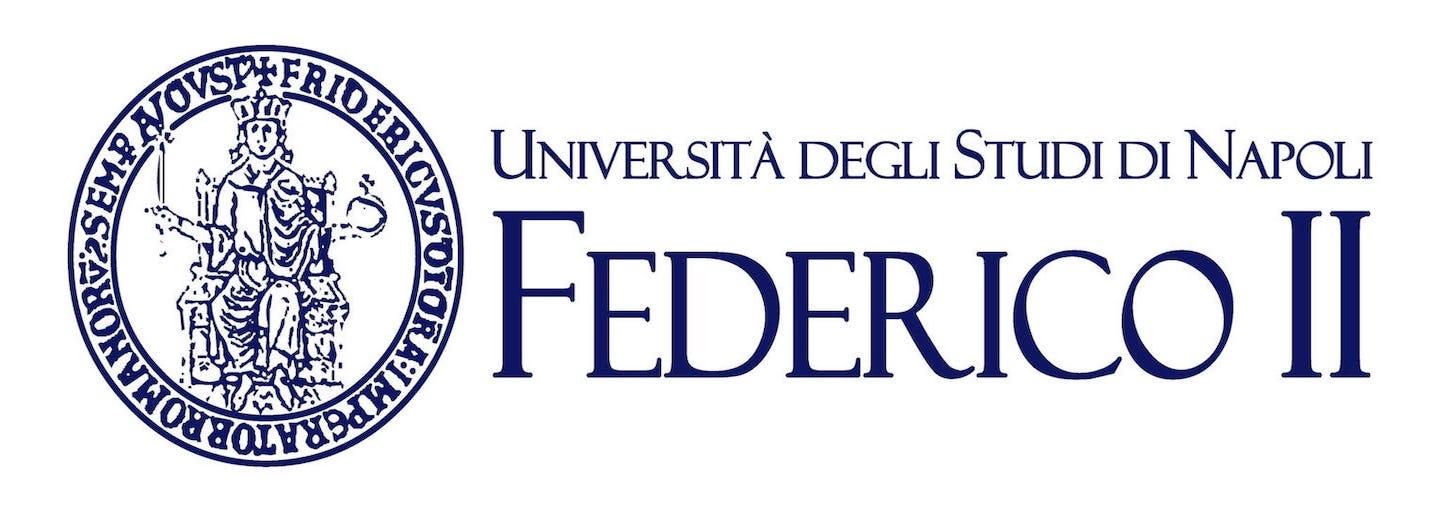

#*Problem Statement*

---


In today's digital world, it's becoming difficult to differentiate the real stuff from the fake and manipulated ones. Due to the advancement in technology, we all are more accustomed to using digital devices. Along with the increase in technological use, the security risk is also increasing tremendously.

Every day we get hundreds of emails in our mailbox. In most cases, all the emails are not important in other words all emails might not be the real ones. Some might contain some malicious content or spam. The project aims to develop a machine learning model to classify an email as a Good email or a Bad (Spam or phishing) email.

The following diagram shows the overall workflow of the project:
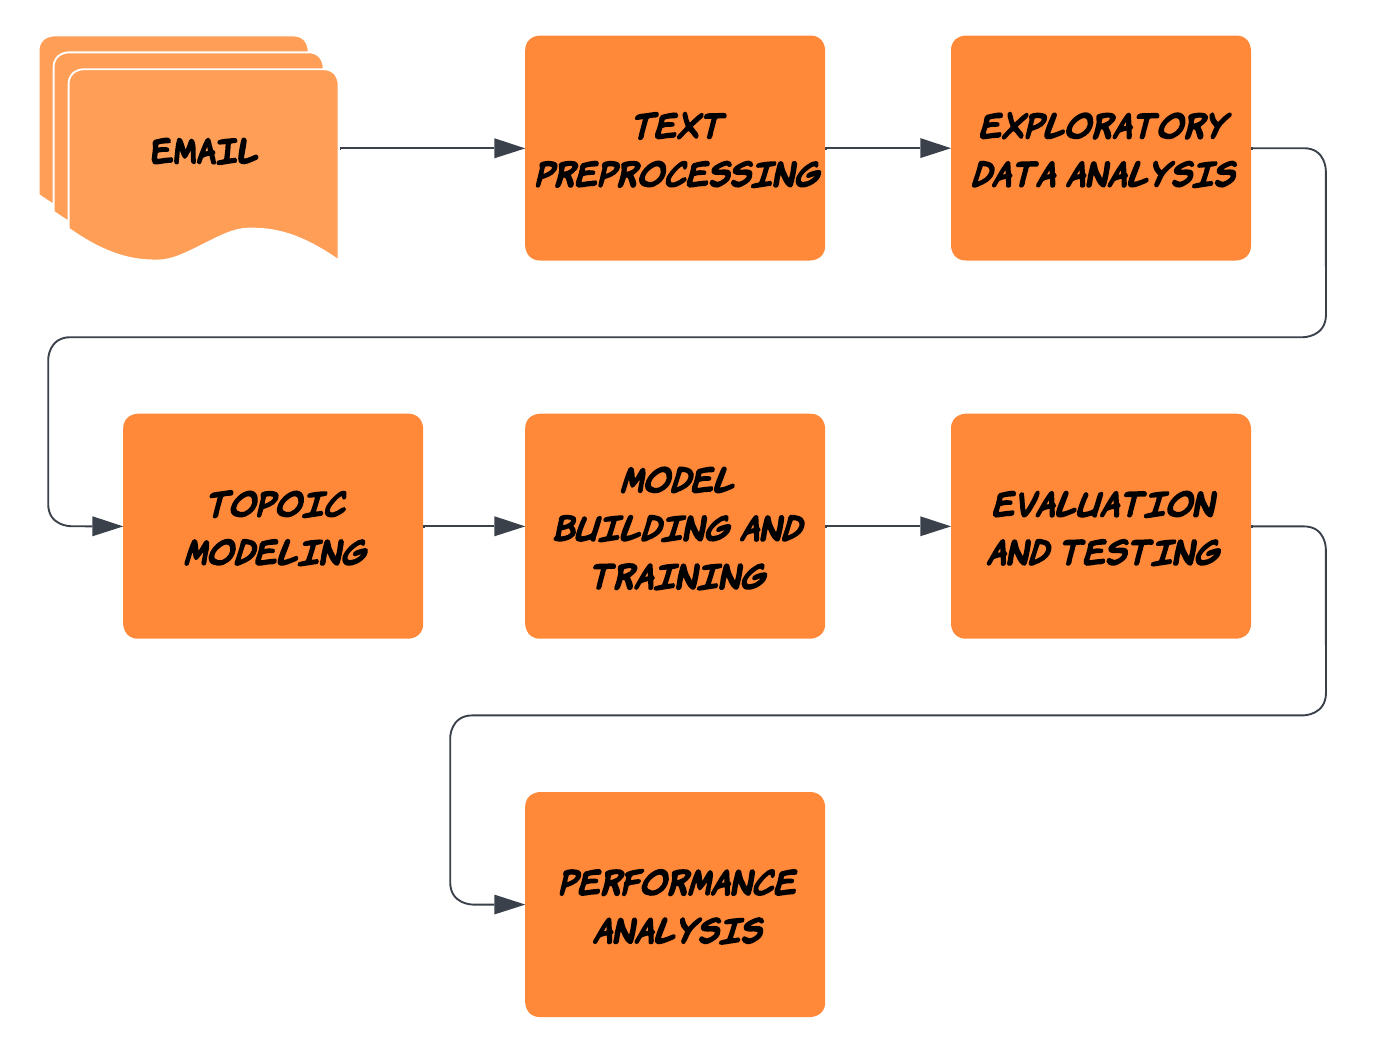


# ***Introduction***
> *Here we are considering a Dataset which contains spam email, phising email and good/informative email. We need to understand the differences and common characteristics between spam and phishing emails.*

> *In general, spam refers to unsolicited, bulk emails sent to a large number of recipients for advertising, or scams. The main purpose of spam is usually to promote products, services, or websites, and it often includes marketing content, advertisements, or links to dubious websites. On the other hand phishing emails are a form of online scam designed to trick recipients into revealing sensitive information, such as passwords, credit card numbers, or personal details. The primary purpose of phishing emails is to influence recipients into taking a specific action, such as clicking on a malicious link or providing confidential information. Both spam and phishing emails may use email spoofing techniques to make the emails appear as if they come from a trusted source.*

> *Here we are considering both spam and phishing email and categorized these as bad emails and others are good email. We are going to use different text analysis and statistical method to analyse the texual data and to develop several model including both intrepretible and black box models to categorize an email as a good or a bad email based on different textual features.*


#Importing Necessary Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go #importing plotly to make interactive plot
from plotly.subplots import make_subplots
from collections import Counter
import warnings
'''to clear the warning message'''
import os
from sklearn.exceptions import ConvergenceWarning
# Filter the warning message
warnings.filterwarnings("ignore", category=FutureWarning)
# Disable convergence warning messages
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Disable Deprecatio warning messages
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\RAJIB\AppData\Local\Temp\ipykernel_19792\4270770345.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#Importing the dataset

In [ ]:
dataset=pd.read_csv("C:/Users/RAJIB/Desktop/Fruad_Email/Dataset/downloaded_dataset.csv")

In [ ]:
#Shape of the dataset
print(dataset.shape)
print("Number of rows:", dataset.shape[0])
print("Number of columns:", dataset.shape[1])

(17669, 3)
Number of rows: 17669
Number of columns: 3


In [ ]:
dataset.rename(columns={"Not S-P/S-P":"label"}, inplace=True)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17669 entries, 0 to 17668
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   email_subject  11992 non-null  object
 1   email_body     17669 non-null  object
 2   label          17669 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 414.2+ KB


In [ ]:
dataset.head()

email_subject  \
0  Account On-hold: Please confirm your eBay info...   
1             Alert eBay Unpaid Item Strike Received   
2                 Aknowledge The Receipt Of the Mail   
3             Notification of limited account access   
4                       KEEPING TRACK OF YOUR USAGE.   

                                          email_body  label  
0  Message sent trough eBay System Your registere...      1  
1  <!-- style2 {color: #0000CC} --> Alert eBay Un...      1  
2  A Computer Database Maintainance is currently ...      1  
3  We recently reviewed your e-gold account, and ...      1  
4  Your web mail quota has exceeded the set quota...      1

# ***Description about the dataset***

---



> *The dataset is a combination of two different datasets. We have used IWSPA-AP-2018 (International Workshop on Security and Privacy Analytics (IWSPA) - Anti Phishing) dataset as well as the Enron spam dataset. IWSPA-AP dataset has phishing emails and authentic emails on the other hand Enron Span dataset has Emails containing Spam and non-spam. Both of the dataset are imbalanced meaning the number of samples for different target class are significantly different. This problem can be ameliorated by using different data augmentation methods. But to overcome this imbalance dataset problem we have concatenated these two datasets which result in a more diverse dataset as well as a balanced one.*

> *In the dataset there are 17669 entries and 3 different feature.*

><table>
  <thead>
    <tr>
      <th>Feature Name</th>
      <th>Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>email_subject</td>
      <td>object</td>
      <td>The subject of the email.</td>
    </tr>
    <tr>
      <td>email_body</td>
      <td>object</td>
      <td>The body of the email.</td>
    </tr>
    <tr>
      <td>label</td>
      <td>int</td>
      <td>The category of the email , either "Good" or "Bad".</td>
    </tr>
  </tbody>
</table>


# ***Exploratory Data Analysis***
***

>*Exploratory Data Analysis (EDA) is an essential step in understanding and preparing the dataset for Email Classification in Natural Language Processing (NLP). Although the dataset consists of text data and categorical variables, EDA can still provide valuable insights. Following are the basic steps of EDA.*

>* ***Data Collection:*** *Gather the dataset and examine its structure, including column names and data types.*
* ***Data Cleaning:*** *Perform data cleaning tasks specific to text data. This includes removing any irrelevant or redundant information, handling missing values, and dealing with inconsistencies in the text.*
* ***Descriptive Statistics:*** *While the dataset may not have numerical variables, we can still calculate descriptive statistics for the text data. This includes determining the length of the text, identifying the most frequent words, or analyzing the distribution of the text length.*
* ***Data Visualization:*** *Use visualizations to gain insights into the text data. For example, word clouds can be created to visualize the most commonly occurring words in both Good and Bad Email articles. Bar plots or pie charts can also illustrate the distribution of different categories or labels in the dataset.*
* ***Data Distribution:*** *Explore the distribution of categorical variables such as the "label" column. This will help understand the proportion of Good and Bad email articles in the dataset and determine if there is a class imbalance.*
* ***Variable Relationships:*** *Investigate relationships between variables by examining the co-occurrence of certain words in the "Email Subject" and "Email Body" columns. This analysis can provide insights into common patterns or phrases associated with Bad Email.*
* ***Feature Engineering:*** *Explore potential features that can be derived from the existing data to improve the performance of Email Classification models. This may involve creating new features such as sentiment scores, readability metrics, or linguistic features based on the text data.*
* ***Data Preparation:*** *Prepare the data for further analysis and modeling tasks. This involves techniques such as text preprocessing, including tokenization, stop-word removal, and stemming/lemmatization. Additionally, encoding categorical variables and splitting the dataset into training and testing sets are crucial steps.*


>*By conducting EDA, we can gain a deeper understanding of the dataset, uncover patterns and characteristics specific to Bad Emails, and prepare the data for subsequent modeling and analysis. These insights will aid in developing robust and accurate Email Classification models.*


#***Checking for Missing Values***


---
*In the process of analyzing our dataset, it is crucial to ensure the absence of missing values, as they can significantly impact the reliability of our results.There can be different types of missing values such as Null or empty cell, incorrect entries. We need to handle this missing values otherwise it might introduce bias and inaccuracies into statistical analyses and machine learning models. *


In [ ]:
null_values = dataset.isnull().sum()
print(null_values)

email_subject    5677
email_body          0
label               0
dtype: int64


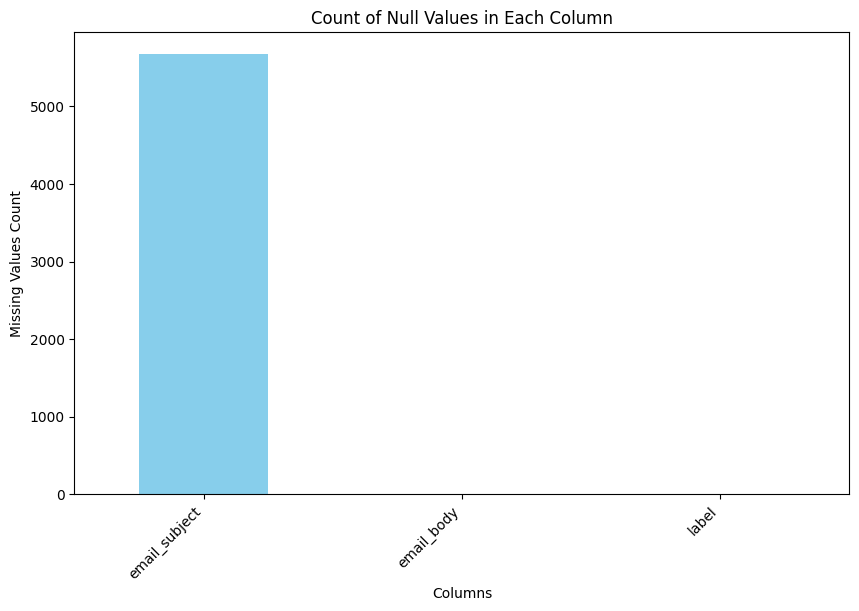

In [ ]:
plt.figure(figsize=(10, 6))
null_values.plot(kind='bar', color='skyblue')
plt.title('Count of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45, ha='right')
plt.show()

> *There are 5677 null values present in the email_subject column. If we simply remove these rows then we will lose large portion of data. So we will replace the null values will empty space as a result we won't lose the corresponding email body feature. Doing so we can see that now none of the feature have any null entries.*

In [ ]:
# Replace null values with an empty string
dataset["email_subject"].fillna("", inplace=True)

In [ ]:
null_values = dataset.isnull().sum()
print(null_values)

email_subject    0
email_body       0
label            0
dtype: int64


# ***Checking the distribution of Good and Bad Emails***

---
> *In order to gain insights into the composition of our dataset, it is essential to examine the distribution of emails across different categories. By conducting this analysis, we can effectively assess the balance between good and bad emails entries.*



In [ ]:
# Calculate the value counts of the "label" column
#here 0: Good Email, 1: Bad Email
counts=dataset["label"].value_counts()
print(counts)

label
0    9163
1    8506
Name: count, dtype: int64


In [ ]:
# Create a pie chart with the percentage of each label
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values, hole=0.5)])

# Add title and legend
fig.update_layout(title='Distribution of Email Label', legend_title='Labels')

# Show the plot
fig.show()

*Our dataset consists of a total of 17,669 Emails, with 9,163 falling under the "Good" category and 8,506 categorized as "Bad." This distribution accounts for approximately 51.9% and 48.1% of the dataset, respectively. Such a balanced distribution ensures that both categories are adequately represented, eliminating the need for any up or downsampling techniques during the model building process.*

#***Benefits of a balanced Dataset***


---

*The balanced nature of our dataset holds significant advantages when it comes to modeling. Unlike imbalanced datasets, which tend to introduce bias and hinder model performance, a balanced dataset provides a fair representation of both classes. This equips our models with the ability to learn effectively from the available data, leading to more accurate and reliable predictions.*

# ***Text Preprocessing: Enhancing Data Quality***

---

*In the pursuit of refining our text data and improving its quality, we will employ various preprocessing techniques. By following a systematic approach, we aim to enhance the meaningfulness and consistency of the text, ensuring its suitability for further analysis. The key steps involved in this text preprocessing phase are as follows:*

*1. Removal of Stopwords: Stopwords, which include common words like "a," "an," "the," and others, are devoid of substantial meaning and often act as connectors within sentences. By eliminating these stopwords, we can focus on the more informative and contextually relevant words, thereby enhancing the overall quality of the text.*

*2. Lowercasing Text: To establish uniformity and ease of analysis, all text will be converted to lowercase. This normalization process eliminates inconsistencies arising from variations in capitalization, ensuring accurate comparisons and facilitating subsequent analyses.*

*3. Handling Special Characters and Spaces: In order to streamline the text further, we will address any special characters, HTML tags, punctuation marks, symbols, or non-alphanumeric characters that may hinder the analysis. By removing these extraneous elements, we maintain data integrity and ensure a clean dataset.*

*4. Elimination of Empty Spaces: Empty spaces within the text can introduce discrepancies and adversely impact subsequent analyses. By identifying and removing these empty spaces, we create a well-structured and cohesive dataset that is ready for in-depth exploration.*

*By executing these text preprocessing operations, we improve the overall quality of our data, setting the stage for more effective analysis and insightful discoveries. The resulting refined dataset will empower us to extract meaningful insights and make informed decisions.*

In [ ]:
#importing nltk library
import nltk
nltk.download('stopwords') #to import necessary stopwords
nltk.download('wordnet') # to import english words that provides information about their meanings, relationships, and usage
nltk.download('punkt') #to import  pre-trained unsupervised machine learning algorithm for tokenizing text into sentences and words
nltk.download('vader_lexicon') # to import pretained sentiment of different words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAJIB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RAJIB\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RAJIB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\RAJIB\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#Defining function to perform preprocessing and cleaning
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

STOPWORDS = set(stopwords.words('english'))
STOPWORDS.remove('not') #removing not from the stop words
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower() # lowercase text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwords from text
    text = re.sub(r'\W', ' ', text) # Remove all the special characters
    text = re.sub(r'\d+', '', text) # remove numerical values
    text = re.sub(r'<.*?>', '', text) # remove HTML tags
    text = re.sub(r'http\S+', '', text) # remove URLs
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # remove all single characters
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) # Remove single characters from the start
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Substituting multiple spaces with single space
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split()) # perform lemmatization to get the root of english words
    return text

In [ ]:
#applying the clean function on the original dataset
dataset['email_subject']=dataset['email_subject'].apply(clean_text)
dataset["email_body"]=dataset['email_body'].apply(clean_text)

In [ ]:
dataset.head()

email_subject  \
0  account on hold please confirm ebay informatio...   
1             alert ebay unpaid item strike received   
2                            aknowledge receipt mail   
3                notification limited account access   
4                                keeping track usage   

                                          email_body  label  
0  message sent trough ebay system registered nam...      1  
1  style color cc alert ebay unpaid item strike r...      1  
2  computer database maintainance currently going...      1  
3  recently reviewed gold account suspect accesse...      1  
4  web mail quota exceeded set quota gb currently...      1

#EDA on both Good and Bad Emails

In [ ]:
#Checking the distribution of the email subject length
# Calculate the length of each article
dataset['article_length_of_email_subject'] = dataset['email_subject'].apply(lambda x: len(x.split()))

# Create a histogram of article lengths
fig = px.histogram(dataset, x='article_length_of_email_subject', color='label', nbins=50,
                   title='Distribution of Email Subject Length')
fig.show()

In [ ]:
#Checking the distribution of the email body length
# Calculate the length of each article
dataset['article_length_of_email_body'] = dataset['email_body'].apply(lambda x: len(x.split()))

# Create a histogram of article lengths
fig = px.histogram(dataset, x='article_length_of_email_body', color='label', nbins=50,
                   title='Distribution of Email Body Length')
fig.show()

#***Insight-1***

---




*1.   Bad emails are having shorter subject and body length (based on word count) compared to the Good emails*




# ***EDA on Good Emails***


---

*In this section, we will conduct a comprehensive exploratory data analysis (EDA) on Good Emails. By utilizing various visualization techniques and analytical approaches, we aim to uncover valuable insights and gain a deeper understanding of this category.*

In [ ]:
dataset_good=dataset[dataset['label']== 0 ].copy() #taking only the Good emails
dataset_good["subject_body"]=dataset_good['email_subject']+ ' ' +dataset_good["email_body"] #combining email body and subject
dataset_good.head()

email_subject  \
503  re nyt crossing line donald trump behaved woma...   
504                    re flag variety interview today   
505                         mosko call o end day thurs   
506  david diamond added new photo album timeline p...   
507  contribution dlc democratic lawyer council ros...   

                                            email_body  label  \
503  great journalism from helmstetter tj helmstett...      0   
504  ok please send briefing chair team upload chai...      0   
505  call pm vince mcmahon assistant call pm marc p...      0   
506  david diamond added new photo album timeline p...      0   
507  contribution data page dlc democratic lawyer c...      0   

     article_length_of_email_subject  article_length_of_email_body  \
503                                9                          2889   
504                                5                            35   
505                                6                            37   
506                                8                            60   
507                                8                           103   

                                          subject_body  
503  re nyt crossing line donald trump behaved woma...  
504  re flag variety interview today ok please send...  
505  mosko call o end day thurs call pm vince mcmah...  
506  david diamond added new photo album timeline p...  
507  contribution dlc democratic lawyer council ros...

# ***Generating WordCloud: Visualizing Key Terms in Good Emails***


---
> *To gain deeper insights into the content and themes of the Good Emails, we will employ the technique of generating a word cloud. A word cloud visually represents the frequency of words in a given dataset, with the size of each word reflecting its relative occurrence.*

> *By creating a word cloud specific to the Good Emails category, we can easily identify the most commonly used words and phrases. These prominent terms offer valuable clues about the prevalent topics, trends, and concerns within the realm of good emails. By visually highlighting these key terms, the word cloud provides an intuitive and impactful way to understand the focal points and emphasis in the Good Emails articles.*

> *The generated word cloud will serve as a powerful visualization tool, enabling us to quickly grasp the overall themes, significant terms, and underlying patterns within the Good Emails dataset. This visualization will enhance our understanding of the content and aid in further analysis and interpretation of the Good Emails.*


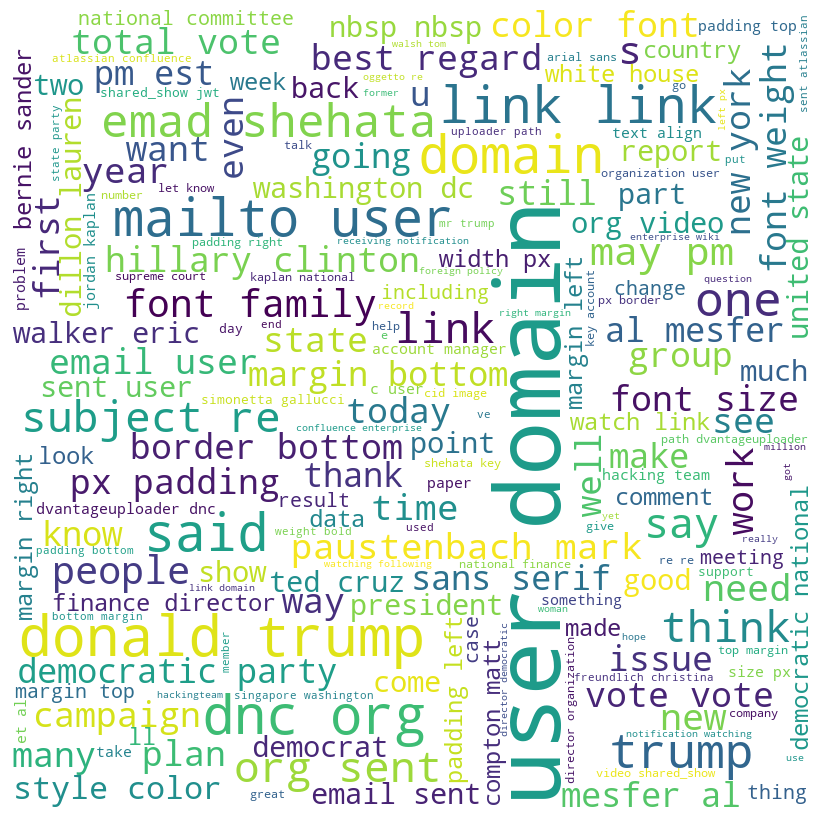

In [ ]:
from wordcloud import WordCloud
# Join all reviews into a single string
all_reviews = ' '.join(dataset_good["subject_body"])
# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_reviews)
# Display the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# ***Sentiment Analysis of Good Emails: Understanding Textual Sentiments***
>*Performing sentiment analysis on Good Emails articles allows us to gain valuable insights into the emotional tone and sentiment expressed within the text. The following subheadings outline the process and steps involved in this analysis.*

>***1.Sentiment Analysis Using SentimentIntensityAnalyzer:***
*The NLTK library provides a SentimentIntensityAnalyzer that utilizes a pre-trained model to determine the sentiment of a given text. This analyzer assigns polarity scores to words, enabling the classification of text into neutral, positive, or negative sentiments based on these scores.*

>***2.Tokenization:***
*Before conducting sentiment analysis, the text undergoes tokenization, which involves breaking it down into individual words within each sentence. Tokenization facilitates the analysis of sentiment for each word in the text.*

>***3.Polarity Score Calculation:***
*For each word in the tokenized text, polarity scores are computed to indicate the degree of positive or negative sentiment associated with the word. Neutral words receive a neutral polarity score. These scores collectively contribute to the overall sentiment analysis of the text.*

>***4.Overall Polarity Score:***
*To determine the overall sentiment of the text, the polarity scores of the individual words are aggregated. This computation provides an overview of the text's sentiment, reflecting its general tone and emotional disposition.*

>***5.Compound Polarity Score:***
*The compound polarity score is calculated based on the aggregated polarity scores, ranging from -1 (indicating a highly negative sentiment) to +1 (indicating a highly positive sentiment). A score of 0 represents a neutral sentiment. This compound polarity score plays a significant role in classifying the text based on its overall sentiment.*

>*By conducting sentiment analysis on Good Emails, we gain valuable insights into the sentiments expressed within the text. This analysis helps us better understand the prevailing attitudes, emotional nuances, and the overall tone conveyed by the Email content.*

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer #importing the library
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to classify the sentiment of an email
def classify_sentiment(email):
    # Use the sentiment analyzer to get the sentiment scores
    sentiment_scores = sia.polarity_scores(email)

    # Determine the overall sentiment label based on the sentiment score
    if sentiment_scores['compound'] >0:
        return 'Positive'
    elif sentiment_scores['compound'] < 0:
        return 'Negative'
    else:
        return 'Neutral'
sia = SentimentIntensityAnalyzer()

# Define a function to calculate the compound score of an email
def get_compound_score(email):
    sentiment_scores = sia.polarity_scores(email)
    return sentiment_scores['compound']

# Apply the sentiment classifier to each email and create a new column
dataset_good['Sentiment'] =dataset_good['subject_body'].apply(classify_sentiment)
dataset_good['compound_score'] = dataset_good['subject_body'].apply(get_compound_score)

In [ ]:
dataset_good["Sentiment"].value_counts()

Sentiment
Positive    6487
Neutral     1492
Negative    1184
Name: count, dtype: int64

In [ ]:
# Calculate the percentage of positive, negative, and neutral Email
positive_email = (dataset_good['Sentiment'] =="Positive" ).sum()
negative_email = (dataset_good['Sentiment'] =="Negative" ).sum()
neutral_email= (dataset_good['Sentiment'] =="Neutral" ).sum()
total_email = dataset_good.shape[0]
positive_pct = positive_email / total_email * 100
negative_pct = negative_email / total_email * 100
neutral_pct = neutral_email / total_email * 100

# Create a pie chart of the percentage of positive, negative, and neutral Emails using Plotly
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_pct, negative_pct, neutral_pct]
colors = ['green', 'red', 'gray']
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, marker=dict(colors=colors))])
fig.update_layout(title='Distribution of Sentiment of Good Emails')
fig.show()

# ***EDA on Bad Emails***

---

*We are going to perform the same task that we have already performed on the Good emails in the Exploratory Data Analysis of Bad Emails.*

# ***Generating WordCloud: Visualizing Key Terms in Bad Emails***

---



In [ ]:
dataset_bad=dataset[dataset['label']== 1 ].copy() #taking only the Bad emails
dataset_bad["subject_body"]=dataset_bad['email_subject']+ ' ' +dataset_bad["email_body"] #combining email body and subject
dataset_bad.head()

email_subject  \
0  account on hold please confirm ebay informatio...   
1             alert ebay unpaid item strike received   
2                            aknowledge receipt mail   
3                notification limited account access   
4                                keeping track usage   

                                          email_body  label  \
0  message sent trough ebay system registered nam...      1   
1  style color cc alert ebay unpaid item strike r...      1   
2  computer database maintainance currently going...      1   
3  recently reviewed gold account suspect accesse...      1   
4  web mail quota exceeded set quota gb currently...      1   

   article_length_of_email_subject  article_length_of_email_body  \
0                                8                            22   
1                                6                           217   
2                                3                            66   
3                                4                            90   
4                                3                            34   

                                        subject_body  
0  account on hold please confirm ebay informatio...  
1  alert ebay unpaid item strike received style c...  
2  aknowledge receipt mail computer database main...  
3  notification limited account access recently r...  
4  keeping track usage web mail quota exceeded se...

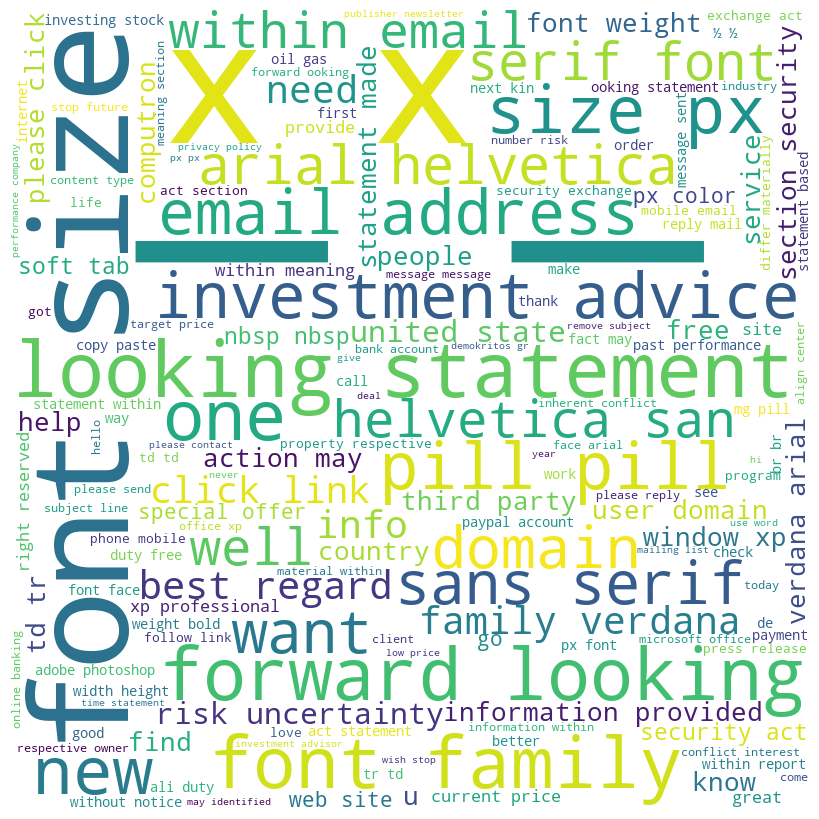

In [ ]:
from wordcloud import WordCloud
# Join all reviews into a single string
all_reviews = ' '.join(dataset_bad["subject_body"])
# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_reviews)
# Display the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#  ***Sentiment Analysis of Bad Emails: Understanding Textual Sentiments***

---



In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer #importing the library
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to classify the sentiment of an email
def classify_sentiment(email):
    # Use the sentiment analyzer to get the sentiment scores
    sentiment_scores = sia.polarity_scores(email)

    # Determine the overall sentiment label based on the sentiment score
    if sentiment_scores['compound'] >0:
        return 'Positive'
    elif sentiment_scores['compound'] < 0:
        return 'Negative'
    else:
        return 'Neutral'
sia = SentimentIntensityAnalyzer()

# Define a function to calculate the compound score of an email
def get_compound_score(email):
    sentiment_scores = sia.polarity_scores(email)
    return sentiment_scores['compound']

# Apply the sentiment classifier to each email and create a new column
dataset_bad['Sentiment'] =dataset_bad['subject_body'].apply(classify_sentiment)
dataset_bad['compound_score'] = dataset_bad['subject_body'].apply(get_compound_score)

In [ ]:
dataset_bad["Sentiment"].value_counts()

Sentiment
Positive    6881
Negative    1223
Neutral      402
Name: count, dtype: int64

In [ ]:
# Calculate the percentage of positive, negative, and neutral Emails
positive_email = (dataset_bad['Sentiment'] =="Positive" ).sum()
negative_email = (dataset_bad['Sentiment'] =="Negative" ).sum()
neutral_email= (dataset_bad['Sentiment'] =="Neutral" ).sum()
total_email = dataset_bad.shape[0]
positive_pct = positive_email / total_email * 100
negative_pct = negative_email / total_email * 100
neutral_pct = neutral_email / total_email * 100

# Create a pie chart of the percentage of positive, negative, and neutral Emails using Plotly
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_pct, negative_pct, neutral_pct]
colors = ['green', 'red', 'gray']
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, marker=dict(colors=colors))])
fig.update_layout(title='Distribution of Sentiment of Bad Emails')
fig.show()

# ***Insight-2***

---



1. *When examining the word cloud, which represents the most frequently occurring words, it is evident that good emails cover a broad range of topics such as the recent U.S. presidential election, various campaigns, voting, and political issues. On the other hand, bad emails have a more limited focus, featuring phrases like "link," "click on the link," "free," "price," "risk," "uncertainty," and "investment advice." This suggests that these emails predominantly concentrate on financial and advertising matters.*

2. *The outcome of sentiment analysis yields an unexpected result. In bad emails, there is a notable percentage of positive sentiment. This implies that these emails are crafted in a way that deceives individuals with fraudulent content, portraying a positive tone to potentially trick recipients.*



# ***Topic Modeling using Latent Semantic Analysis for Good Emails: Unveiling Hidden Themes***

---

>*Topic modeling using Latent Semantic Analysis (LSA) allows us to uncover the underlying themes and concepts present in Good emails. By clustering similar words and identifying related terms, LSA helps us summarize the content of these articles and discover latent features within the dataset.*

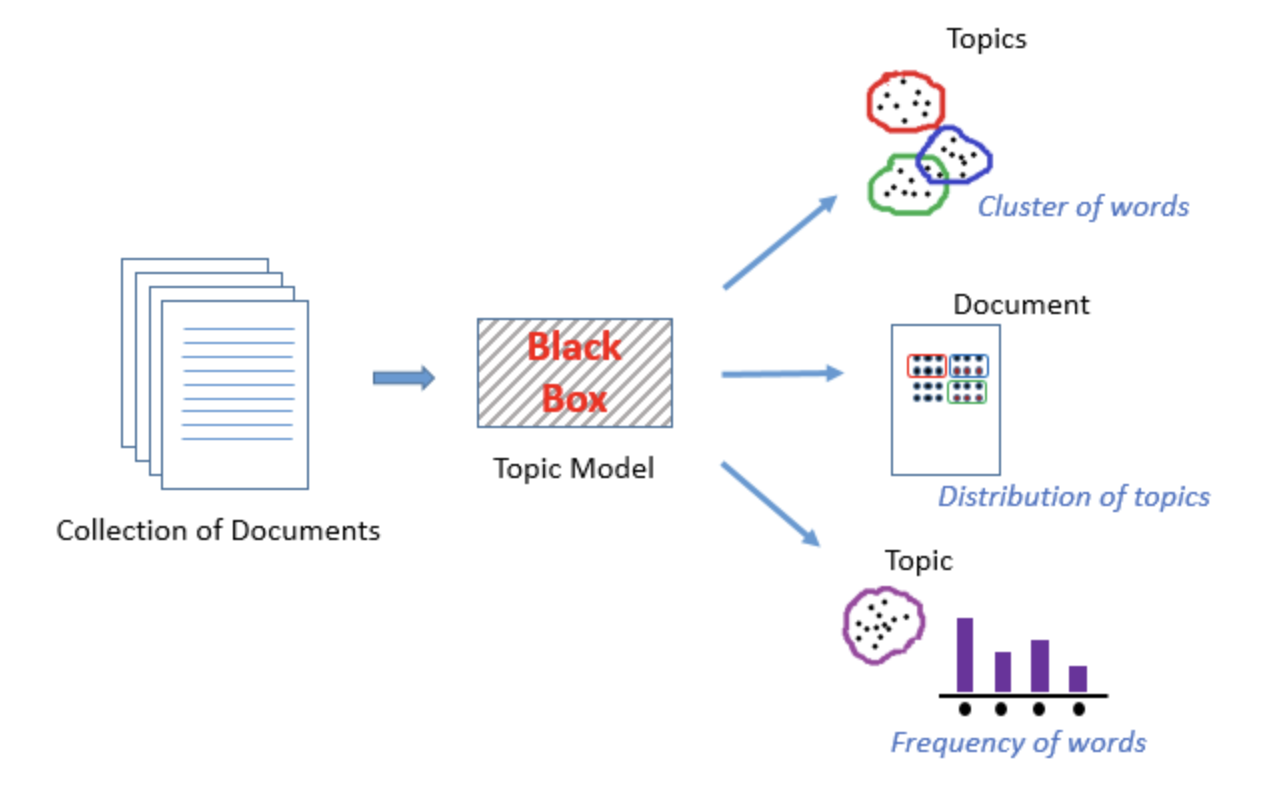

>***1.Understanding Synonymy and Polysemy:***
*In language, we encounter two key concepts: synonymy and polysemy. Synonymy refers to words that have similar or identical meanings, such as "happy" and "joyful." Polysemy, on the other hand, pertains to words with multiple meanings, like "bank" referring to a financial institution or the edge of a river. These concepts pose challenges for machines, as determining the intended meaning solely based on individual words can be problematic. LSA overcomes these limitations by capturing latent topics that contextualize the words used in the articles.*

>***2.The Role of LSA in Uncovering Topics:***
*Rather than solely mapping documents to words, LSA enables the discovery of latent topics that underlie the words' usage. By employing LSA, we can better understand the hidden concepts and themes within the Good Emails. This approach helps bridge the gap between the limitations of machines and the contextual understanding humans possess.*

>***3.The Importance of TF-IDF:***
*Before implementing LSA, it is crucial to comprehend the concept of Term Frequency-Inverse Document Frequency (TF-IDF). TF-IDF identifies words that are important but less common within the corpus, which is the collection of all documents. The process involves calculating the Term Frequency (TF) to determine the frequency of each word in a document. The Inverse Document Frequency (IDF) measures the significance of a word in the entire corpus by considering the logarithm of the total number of documents divided by the number of documents containing that word. Multiplying TF by IDF yields the TF-IDF score, emphasizing the uniqueness and importance of words specific to individual documents or occurring in a limited number of documents.*

*By leveraging LSA and understanding the TF-IDF approach, we can effectively perform topic modeling on Good Emails. This methodology helps us identify the hidden topics, extract meaningful insights, and gain a deeper understanding of the content presented in the dataset.*


***Reference:*** [*A Stepwise Introduction to Topic Modeling using Latent Semantic Analysis (using Python)*](https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/?)




## ***Implementation of Latent Semantic Analysis (LSA)***
***



>*In this section, we will delve into the implementation of Topic Modeling using Latent Semantic Analysis (LSA) to extract latent topics from the Good Email dataset. The process involves several steps:*

>***1.Document-Term Matrix:***
*We begin by computing the document-term matrix, which has dimensions* A*B, where A represents the number of text documents and B represents the number of unique words in the dataset. The matrix is constructed using TF-IDF scores, which help identify the importance of each word in a document relative to the entire corpus.*

>***2.Dimensionality Reduction with SVD:***
*To reduce the dimensionality of the document-term matrix, we employ the widely-used dimensionality reduction algorithm called Singular Value Decomposition (SVD). SVD decomposes the matrix C into three other matrices: U, S, and Vᵀ (the transpose of matrix V).*

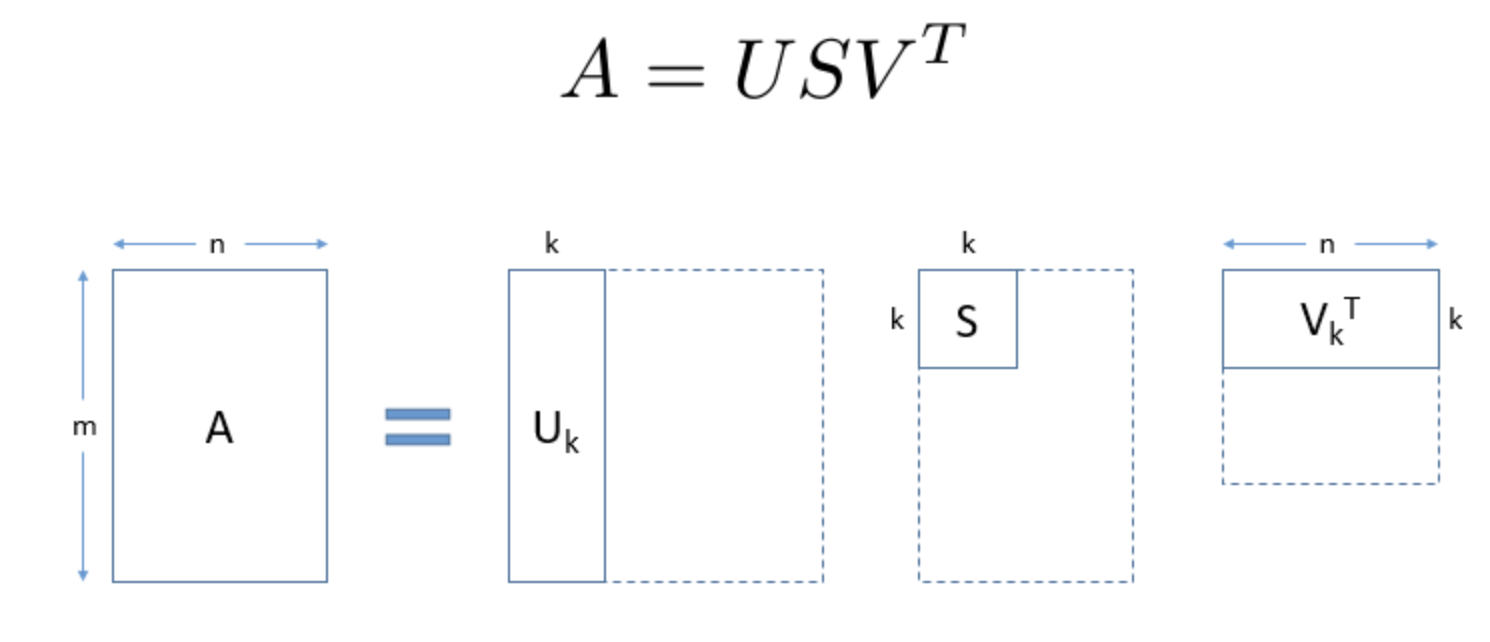

>***3.Matrix Decomposition:***
*The decomposition is represented as follows: C = USVᵀ, where U is an A x A unitary matrix, S is an A x B rectangular diagonal matrix with non-negative real numbers on the diagonal, and V is a B x B unitary matrix. The columns of U represent the left singular vectors of C, the columns of V represent the right singular vectors of C, and the diagonal entries of Σ represent the singular values of C.*

>***4.Vector Representation of Documents and Terms:***
*Each row of the matrix Uₖ (document-term matrix) represents the vector representation of the corresponding document. The length of these vectors is k, which corresponds to the desired number of topics. Similarly, the matrix Vₖ (term-topic matrix) provides vector representations for the terms in the dataset. These vectors can be utilized to identify similar words and documents within the corpus, enabling topic exploration and analysis.*

>***5.Exploring Similarity:***
*By leveraging the vector representations obtained from SVD, we can analyze the similarity between words and documents in the Good Email dataset. These representations enable us to find similar words based on their vector proximity and identify related documents that share similar topics. This information aids in discovering common themes and extracting insights from the dataset.*

>*The implementation of LSA and the subsequent analysis of the vector representations enable us to uncover latent topics within the Good Emails dataset. By understanding the similarity and relationships between words and documents, we gain a deeper comprehension of the underlying themes and can further explore the content presented in the Emails.*




# ***Creating Document-Term Matrix***

---



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #importing TF-IDF
vectorizer = TfidfVectorizer(stop_words='english',
max_features= 1000, # keep top 1000 terms
max_df = 0.5, #terms that appear in more than 50% of the documents will be ignored
smooth_idf=True) # To add 1 to the numerator and denominator of the IDF calculation to avoid division by zero errors
X = vectorizer.fit_transform(dataset_good['subject_body'])

X.shape # check shape of the document-term matrix

(9163, 1000)

## ***Topic Modeling - Vector Representation of Terms and Documents***
***

>*To transform the terms and documents in the document-term matrix into numerical vectors, we employ matrix decomposition, a technique that breaks down the larger matrix into smaller, more manageable matrices. This transformation allows us to represent the terms and documents in a numerical format, facilitating further analysis and topic modeling.*

>*In our case, we will utilize the TruncatedSVD class from the scikit-learn library to perform the matrix decomposition. TruncatedSVD is specifically designed to handle sparse matrices, such as our document-term matrix, efficiently. By applying TruncatedSVD, we can reduce the dimensionality of the matrix while preserving its important characteristics.*

>*Upon completion of the matrix decomposition, we obtain a set of numerical vectors that represent each term and document from the original matrix. These vectors serve as a compact and meaningful representation of the underlying topics present in the Good Emails dataset.*

>*These numerical representations allow us to perform topic modeling and explore the relationships between terms and documents more effectively. By analyzing the patterns and similarities within these vectors, we gain insights into the latent topics and thematic structures within the Good Emails dataset. This enables us to uncover hidden connections, identify important themes, and facilitate the interpretation of the textual data.*

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors
svd_model = TruncatedSVD(n_components=40, algorithm='randomized', n_iter=100, random_state=122)
#considerting first 40 topics

svd_model.fit(X)

len(svd_model.components_) #number of topics

40

In [ ]:
#printing the top 40 topics
terms = vectorizer.get_feature_names_out()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x: x[1], reverse=True)[:10] # to print first 10 terms

    topic_words = " ".join([t[0] for t in sorted_terms])
    print("Topic " + str(i) + ": " + topic_words)

Topic 0: user domain national link jordan kaplan finance director mailto democratic
Topic 1: national jordan kaplan finance director committee democratic user mailto domain
Topic 2: tentative confluence calendar updated event atlassian wiki watching enterprise notification
Topic 3: deadline domain email user list hollywood inbox folder spam urgent
Topic 4: link deadline national kaplan jordan finance committee democratic director twitter
Topic 5: link user list mailto hackingteam domain pm mobile click hacking
Topic 6: hackingteam mobile data www hacking emad paper shehata email team
Topic 7: list email trump domain republican donald democratic national committee clinton
Topic 8: trump hackingteam hacking emad mobile shehata www team singapore oggetto
Topic 9: mosko business pm steve list email mobile delete hackingteam photo
Topic 10: photo david new added like facebook share comment people ca
Topic 11: video request trump kaplan jordan comm_d dnc org hackingteam sent
Topic 12: emad s

# ***Topic Modeling using Latent Semantic Analysis for Bad Emails***
>*Similar to the approach used for Good Emails, we will apply Topic Modeling using Latent Semantic Analysis (LSA) to extract latent topics from the Bad Emails dataset. By following the same steps as outlined earlier, we aim to uncover the underlying themes and patterns specific to the Bad Emails category.*

##***Creating Document-Term Matix***
***

In [ ]:
vectorizer_bad = TfidfVectorizer(stop_words='english',
max_features= 1000, # keep top 1000 terms
max_df = 0.5, #terms that appear in more than 50% of the documents will be ignored
smooth_idf=True) # To add 1 to the numerator and denominator of the IDF calculation to avoid division by zero errors
X_bad = vectorizer_bad.fit_transform(dataset_bad['subject_body'])

X_bad.shape # check shape of the document-term matrix

(8506, 1000)

In [ ]:
svd_model.fit(X_bad)

len(svd_model.components_) #number of topics

40

In [ ]:
#printing the top 40 topics of Bad Emails
terms = vectorizer_bad.get_feature_names_out()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x: x[1], reverse=True)[:10] # to print first 10 terms

    topic_words = " ".join([t[0] for t in sorted_terms])
    print("Topic " + str(i) + ": " + topic_words)

Topic 0: com http account email www company click information message price
Topic 1: account paypal information security mail email link bank update company
Topic 2: company statement stock investment report security forward news business looking
Topic 3: software adobe xp window professional microsoft office cd mx computron
Topic 4: com www computron http message contact remove subject free duty
Topic 5: computron price cialis viagra pill prescription soft message tab drug
Topic 6: http com www account statement paypal info stock php cheap
Topic 7: lottery number claim fund soft winning prize international mr cialis
Topic 8: soft tab pill cialis new email hour message ebay sex
Topic 9: email message ebay mobile phone medication oo mailbox mail prescription
Topic 10: save hello shop nice rate day total worldwide al welcome
Topic 11: ebay save message nice shop day font total welcome item
Topic 12: ebay rate credit mortgage low loan item application bad payment
Topic 13: pill paypal mob

# ***Outcome Analysis - Comparing Topics in Good and Bad Emails***

---

***Topics for Good Emails:***

1. **Political Communication:** Discussions related to user domain, national issues, finance, and political figures like Jordan Kaplan.
2. **Calendar and Events:** Topics related to calendar updates, events, and enterprise notifications.
3. **Urgent Deadline:** Urgent messages about deadlines, possibly related to political activities.
4. **Twitter Links:** Topics containing links related to national finance, committee discussions, and Twitter.
5. **Hacking and Security:** Discussions about hacking, mobile security, and related topics.
6. **Team Communication:** Internal communication within a team, possibly related to hacking or security.
7. **Political Figures:** Discussions involving political figures like Trump, Clinton, and the Democratic National Committee (DNC).
8. **Hacking and Team:** Communication related to hacking, mobile security, and team activities.
9. **Business and Contributors:** Discussions about business, contributors, and contributions.
10. **Social Media:** Discussions involving photos, Facebook, and sharing on social media.

**Topics for Bad Emails (Spam or Phishing):**

1. **General Account Information:** Emails with links and information related to accounts and companies.
2. **PayPal and Security:** Topics about PayPal, account security, and information updates.
3. **Business Investment:** Discussions related to business statements, stock, investment reports, and security.
4. **Software and Computing:** Messages related to software, Adobe, Microsoft, and computing products.
5. **Price and Contact:** Topics containing information about prices, contacts, and removal requests.
6. **Medications and Prices:** Discussions about medications, prices, prescriptions, and pharmacy products.
7. **Lottery and Prizes:** Messages related to lottery claims, winning prizes, and international funds.
8. **Cialis and Viagra:** Topics about Cialis, Viagra, pills, prescriptions, and drug information.
9. **Email Promotions:** Emails promoting various products, websites, and rates.
10. **eBay and Shopping:** Messages about eBay, shopping, rates, and items.

**Overall observations:**

1. Good emails cover a diverse range of topics, including politics, events, security, and business.
2. Bad emails predominantly focus on spam, phishing, medications, lottery claims, and various offers.
3. Positive sentiment dominance in bad emails suggests a deceptive use of language to trick recipients.

## ***Model Building - Interpretable ML, Ensemble, and Deep Learning***
***

>*In this section, we will develop three types of models to analyze and predict Email: interpretable machine learning models (Decision Trees), ensemble models (Random Forest), and deep learning models. Decision Trees provide clear insights into the decision-making process, Random Forest combines multiple trees for improved performance, and deep learning models capture complex patterns. By comparing their results, we can choose the most suitable approach for predicting the nature of Email.*

##***Decision Tree***
***

>*A Decision Tree Classifier is a popular machine learning algorithm used for both classification and regression tasks. It is a non-linear and non-parametric algorithm that makes decisions by recursively splitting the data into subsets based on the values of input features. Each split is designed to separate the data into distinct classes or groups, eventually forming a tree-like structure.*

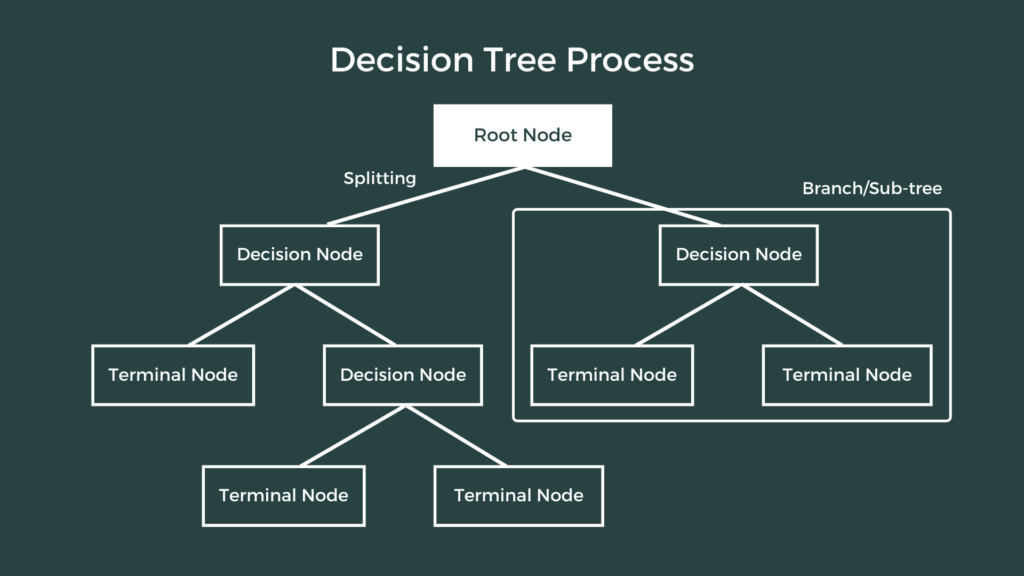

>*Here it performs split in such a way that it can increase the information gain (information gain measures how much more information we gain about the target variable by splitting the node based on a particular feature) and reduce the Entropy and Gini Impurity. Entropy is the measure of Randomness or uncertainty in the data. In general, it is used to measure the impurity in a node. The entropy is 0 when all the data in the node belong to the same class meaning the node is pure, and it is larger when the data are more evenly split between different classes which means the node is impure.*

>**How Decision Tree Classifier Works:**

>* ***Data Splitting:*** *The decision tree starts by analyzing the entire dataset at the root node. It selects the best feature (or attribute) to split the data based on certain criteria. The goal is to find the feature that provides the most significant separation between classes.*

>* ***Node Creation:*** *The selected feature is used to create a decision node, which acts as a binary question. The data is divided into two subsets based on the feature's value: one branch for the data that satisfies the condition (e.g., feature value > 5), and another branch for the data that does not.*

>* ***Recursive Process:*** *The process of data splitting and node creation is repeated for each subset (branch) created in the previous step. It continues until all data points in a branch belong to the same class or meet a predefined stopping criterion.*

>* ***Leaf Nodes:*** *When the algorithm reaches a point where it can no longer split the data effectively, it creates leaf nodes. Each leaf node represents a specific class or category, and the data points that end up in the leaf node are assigned to that class.*

>* ***Decision Rules:*** *The decision tree forms a set of decision rules based on the tree structure. These rules can be used to classify new, unseen data by following the path from the root node to a specific leaf node.*

# ***Workflow diagram of interpretable ML models***

---



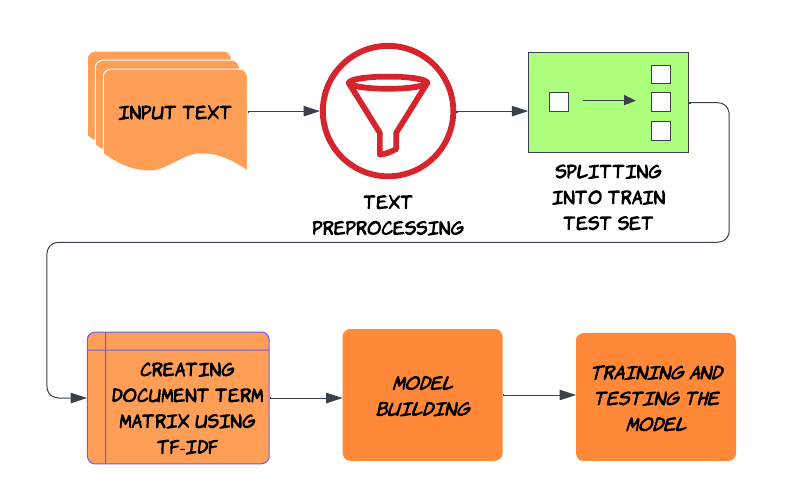)

##***Preparing Data for Model***
***

>*We have to prepare data for training and testing the model. It includes separating the dependent and independent variables and splitting the dataset into train and test sets. So far we have worked with Good and Bad Email data separately but for the model, we need to consider both at the same time. So we need to perform preprocessing in the combined dataset.*

In [ ]:
dataset_model=dataset.copy() #creating a copy of the original dataset
dataset_model["subject_body"]=dataset_model["email_subject"]+ ' ' + dataset_model["email_body"] #combining text and title
dataset_model.columns

Index(['email_subject', 'email_body', 'label',
       'article_length_of_email_subject', 'article_length_of_email_body',
       'subject_body'],
      dtype='object')

In [ ]:
dataset_model.head()

email_subject  \
0  account on hold please confirm ebay informatio...   
1             alert ebay unpaid item strike received   
2                            aknowledge receipt mail   
3                notification limited account access   
4                                keeping track usage   

                                          email_body  label  \
0  message sent trough ebay system registered nam...      1   
1  style color cc alert ebay unpaid item strike r...      1   
2  computer database maintainance currently going...      1   
3  recently reviewed gold account suspect accesse...      1   
4  web mail quota exceeded set quota gb currently...      1   

   article_length_of_email_subject  article_length_of_email_body  \
0                                8                            22   
1                                6                           217   
2                                3                            66   
3                                4                            90   
4                                3                            34   

                                        subject_body  
0  account on hold please confirm ebay informatio...  
1  alert ebay unpaid item strike received style c...  
2  aknowledge receipt mail computer database main...  
3  notification limited account access recently r...  
4  keeping track usage web mail quota exceeded se...

In [ ]:
#Seperating Independent and Dependent Variable
X=dataset_model['subject_body']
y=dataset_model['label']

In [ ]:
#Performing train test split 80:20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20,  stratify=y)

In [ ]:
#Converting text to vectore using TF-IDF considering 1000 words
x_train_vector= vectorizer.fit_transform(x_train)
x_test_vector=vectorizer.transform(x_test)
print(x_train_vector.shape)
print(x_test_vector.shape)

(14135, 1000)
(3534, 1000)


In [ ]:
#Training the model (Decision Tree)
from sklearn.tree import DecisionTreeClassifier
classifier_dt= DecisionTreeClassifier()
classifier_dt.fit(x_train_vector,y_train)

DecisionTreeClassifier()

Accuracy: 0.9298245614035088
Precision: 0.9332140727489565
Recall: 0.9200470311581422
F1 Score: 0.9265837773830669


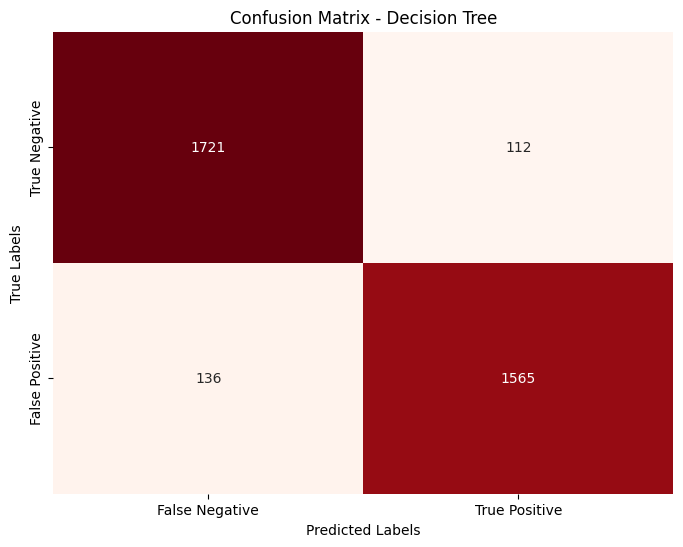

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Making prediction on test set
y_pred = classifier_dt.predict(x_test_vector)

# Checking the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Checking the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Define the categories for the confusion matrix
categories = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Convert confusion matrix to a DataFrame
confusion_df = pd.DataFrame(confusion_mat, index=categories[:2], columns=categories[2:])

# Plot the confusion matrix as a heatmap with colors
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


##***Random Forest***
***

>*It's an ensemble algorithm that uses bagging. It uses Bootstrap sampling to repeatedly draw samples with replacements from the original dataset to create new datasets of the same size. Unlike the decision tree instead of considering only one tree it considered multiple trees to make a decision. After performing different computations the final decision is made by majority voting among all the trees available which made different decisions.*

In [ ]:
#Training the model (Random Forest) with default parameters (by default 100 trees will be considered)
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=0) #setting random state 0 to make reproducible result over different run
classifier_rf.fit(x_train_vector, y_train)

RandomForestClassifier(random_state=0)

Accuracy: 0.9623655913978495
Precision: 0.9644549763033176
Recall: 0.9570840681951793
F1 Score: 0.960755385069342


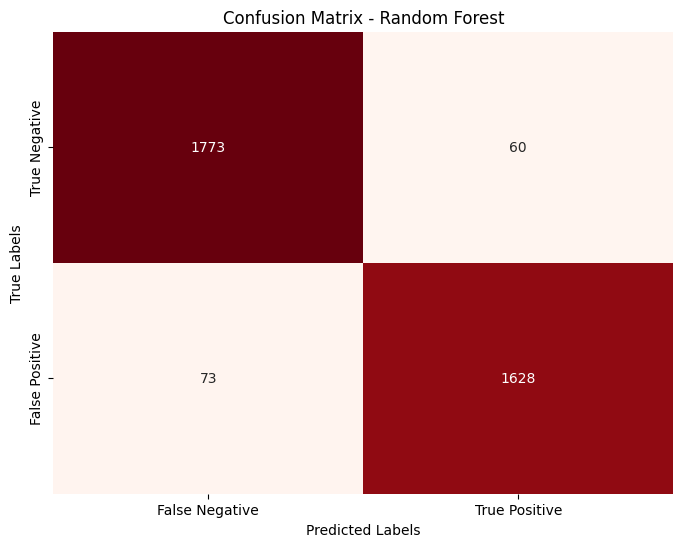

In [ ]:
# Making prediction on the test set
y_pred_rf = classifier_rf.predict(x_test_vector)

# Checking the accuracy on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Checking the confusion matrix
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate precision, recall, and F1 score
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

# Define the categories for the confusion matrix
categories_rf = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Convert confusion matrix to a DataFrame
confusion_df_rf = pd.DataFrame(confusion_mat_rf, index=categories_rf[:2], columns=categories_rf[2:])

# Plot the confusion matrix as a heatmap with colors
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df_rf, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()


#***Comparing Decision Tree and Random Forest***


---

| Model           | Accuracy | Precision | Recall  | F1 Score |
|-----------------|----------|-----------|---------|----------|
| Decision Tree   | 0.928    | 0.938     | 0.911   | 0.924    |
| Random Forest   | 0.963    | 0.966     | 0.958   | 0.962    |


## ***Recurrent Neural Network (RNN)***
****

*   *RNN is a type of neural network that is designed to handle sequential data. This means it can process data in a sequence, like sentences in natural language, time series data, music, or speech.*
* *Traditional feedforward neural networks process input data in one direction and do not have memory. RNNs, on the other hand, have loops in their architecture, which allows them to maintain internal states, making them suitable for sequential data processing.*

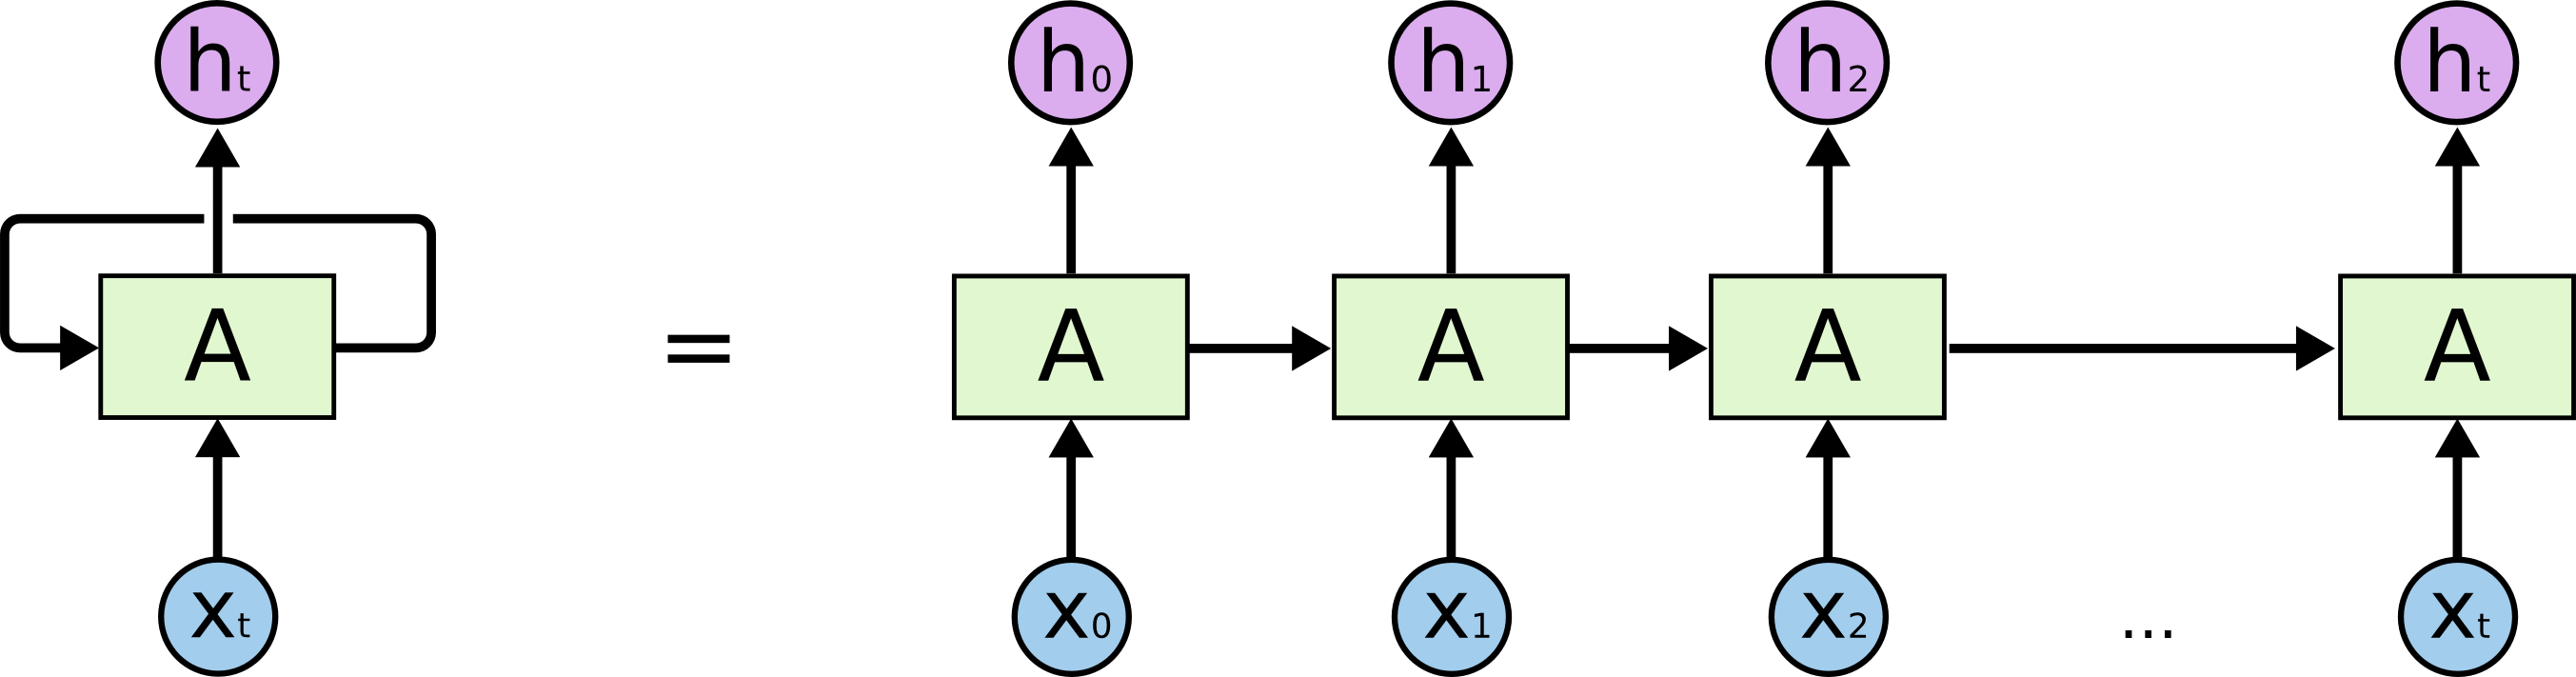



#***LSTM***
***

>*LSTM stands for Long Short Term Memory. It's a family of RNN (Recurrent Neural Network). The main drawback of conventional RNN is it does suffer from vanishing and exploding gradient problem. For this reason it cant not captaure long term dependency. To solve this problem LSTM comes into picture. It has three different gates. Input gate, output gate and memory gates. Memory gate is reponsible for hondling informaiton about the previous time stamp which helps to hold the information can enables long term dependency.*

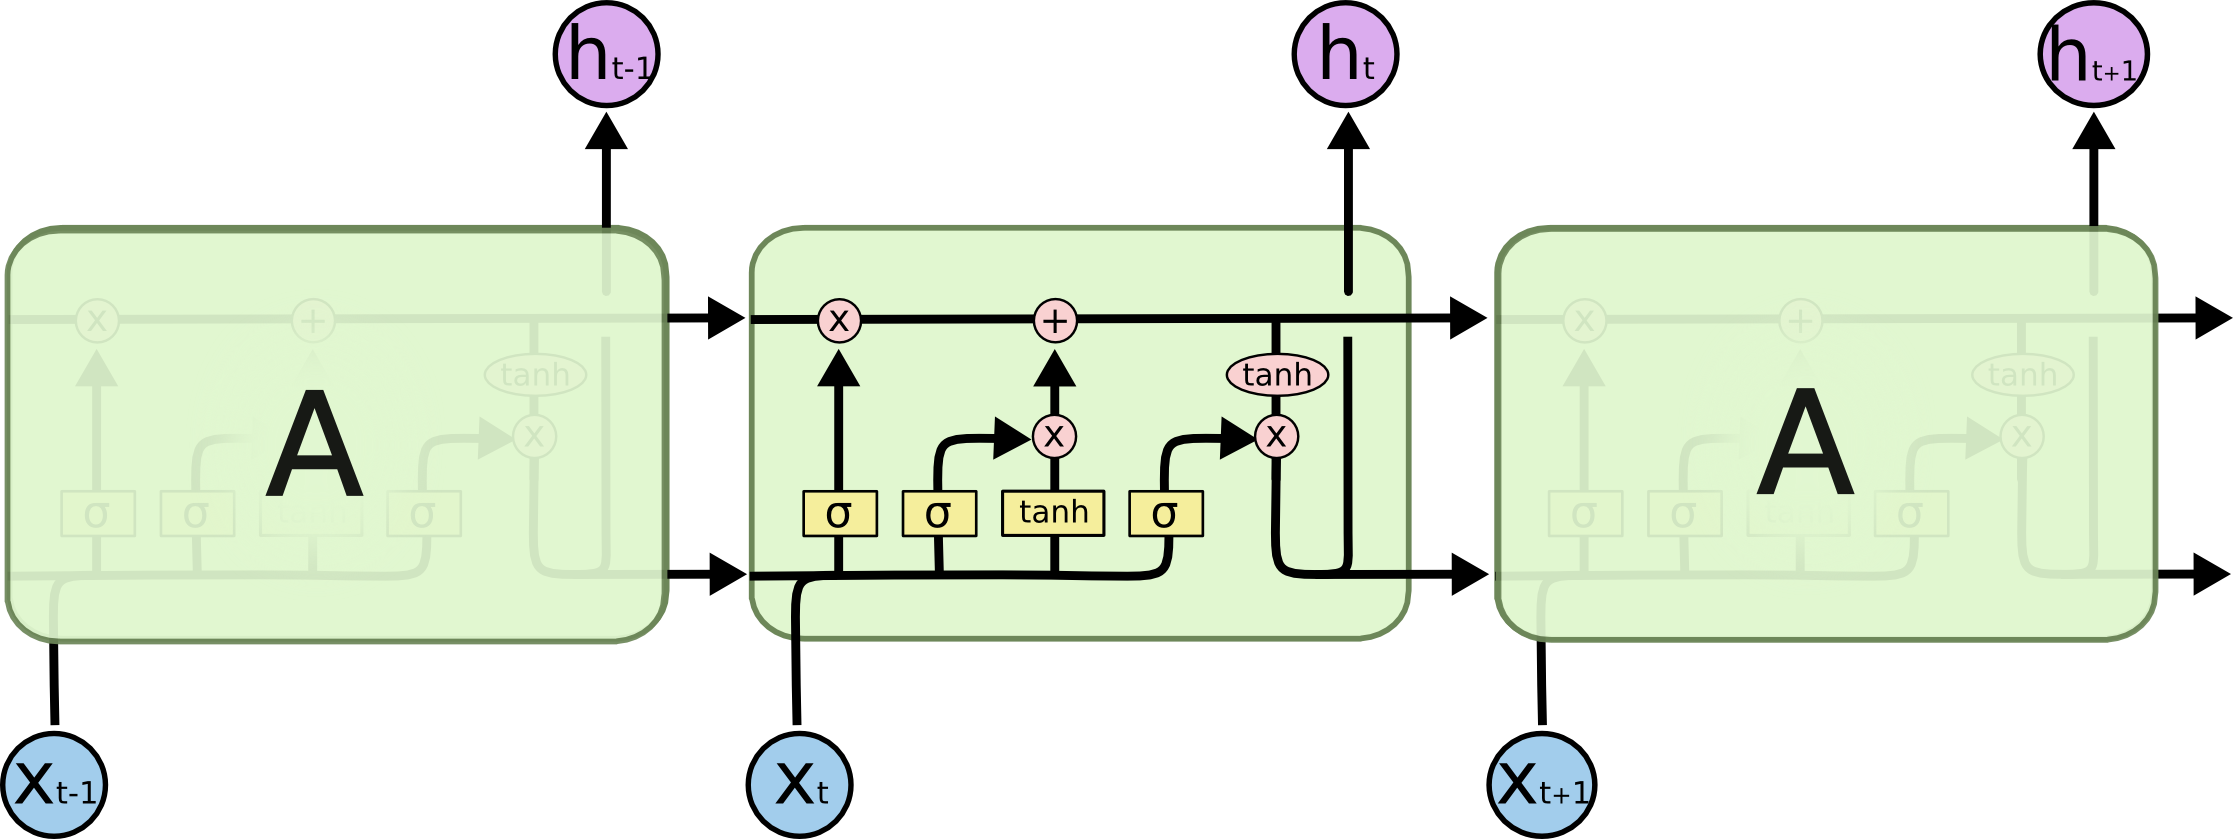

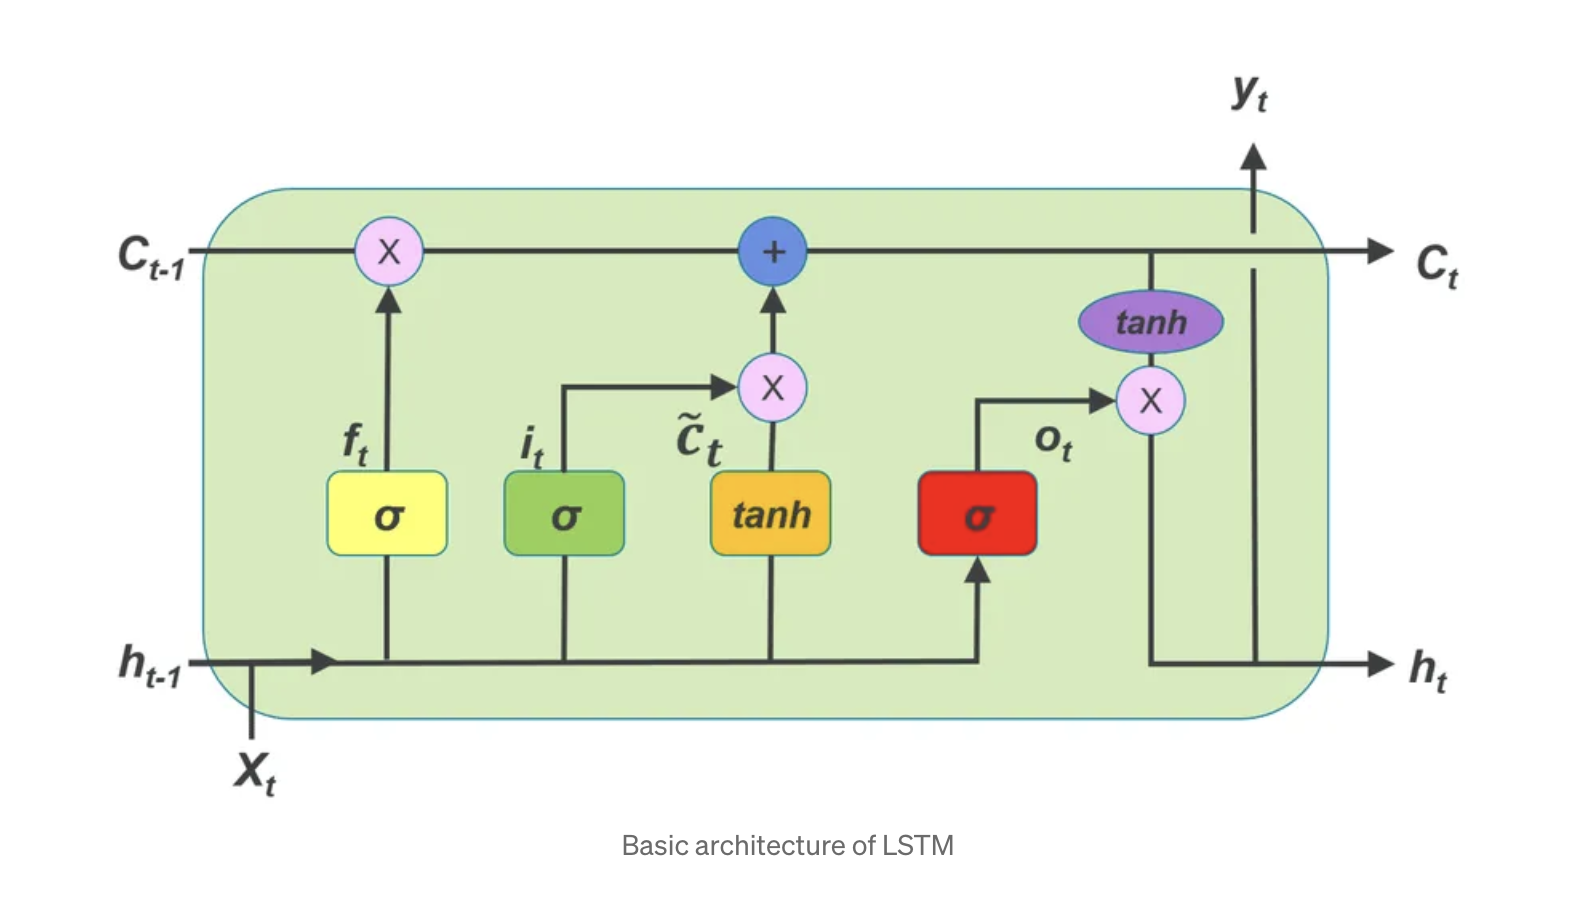

>*Reference:* [*Understanding LSTM Networks*](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

> *In LSTM information flows in one direction. So it holds dependency in one direction. But for text processing task sometimes to give a word in nth time stamps both (n-1)th and (n+1)th time stamps information is needed. It can be done using Bidirectional LSTM. Here information flows not only forward direction but also reverse direction also. As a result it can holds information in both the direction enabling long term dependency in both the direction.In a standard LSTM, the hidden state of the model is updated based on the input sequence in the forward direction only, from left to right. However, in a BiLSTM, there are two sets of hidden states, one for the forward direction and one for the backward direction, which are updated separately based on the input sequence in both directions, from left to right and from right to left.*

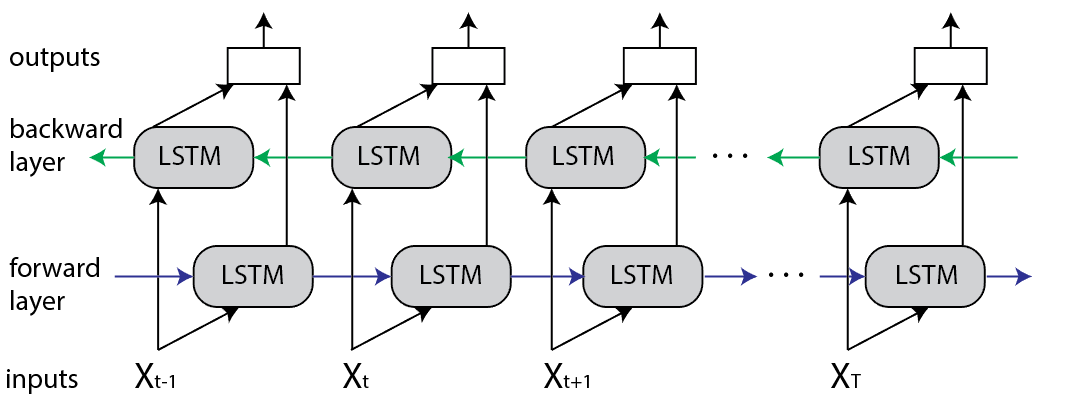

>*Reference:* [*Complete Guide to RNN, LSTM, and Bidirectional LSTM*](https://dagshub.com/blog/rnn-lstm-bidirectional-lstm/)

#***Tokenization and other preprocessing***

> *Tokenization: Tokenization is the process of breaking down a text into individual words or tokens. This step is important because it reduces the complexity of the text data and makes it easier for a machine learning algorithm to process. Tokenization is a fundamental step in many natural language processing tasks, such as sentiment analysis, text classification, and machine translation.*

> *Vocabulary size limitation: Limiting the vocabulary size to the most frequent words is important because it reduces the dimensionality of the data and prevents overfitting. By focusing on the most frequent words, the model can learn the most important features of the text data and avoid being influenced by noise or irrelevant data.*

> *Padding and truncation: Padding and truncation are important because they ensure that all the reviews have the same length, which is required for training neural networks. By setting a fixed length for the reviews, we are able to create a consistent input size for the neural network. Padding with zeros ensures that shorter reviews are the same length as longer reviews, and truncation ensures that longer reviews are cut down to the same length.*

> *Word-to-index mapping: The word-to-index mapping is important because it allows us to represent the text data as sequences of integers, which can be fed into a neural network. By mapping each word to a unique integer value, we can represent the text data in a numerical format that can be processed by the model.*

In [ ]:
from keras.preprocessing.text import Tokenizer #importing the tokenizer object
from tensorflow.keras.preprocessing.sequence import pad_sequences # to perform padding

# The maximum number of words to be used. (most frequent)
MAX_Number_of_WORDS = 60000

# Max number of words in each EMAIL.
MAX_lenght_of_sequeunce = 250

# fixing the dimention of the word embedding vector
Embedding_Dimention = 100

# Create a tokenizer object with specified parameters
tokenizer = Tokenizer(num_words=MAX_Number_of_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(dataset_model['subject_body'].values)

# Get the word-to-index mapping for the tokenizer
word_index = tokenizer.word_index

# Print the number of unique tokens in the vocabulary
print('Found %s unique tokens.' % len(word_index))

# Convert the text data to sequences of integers
X = tokenizer.texts_to_sequences(dataset_model['subject_body'].values)

# Pad or truncate sequences to a fixed length
X = pad_sequences(X, maxlen=MAX_lenght_of_sequeunce)

# Print the shape of the data tensor
print('Shape of data tensor:', X.shape)

Found 143795 unique tokens.
Shape of data tensor: (17669, 250)


#***Splitting the dataset***
***
>*Here we are splitting the entire dataset into train, test and validation test. Train and validation is to check the performance of the model while training after that testset will be used to check the performance of the model after training.*

In [ ]:
# Map "positive" and "negative" to 1 and 0, respectively
Y= dataset_model["label"]

# Split the data into training and testing sets (80/20 split)
train_texts, rest_texts, train_labels, rest_labels = train_test_split(X,
                                                                      Y,
                                                                      train_size=0.8,
                                                                      random_state=42)

# Split the training data into training and validation sets (80/10/10 split)
test_texts, val_texts, test_labels, val_labels = train_test_split(rest_texts,
                                                                    rest_labels,
                                                                    test_size=0.5,
                                                                    random_state=42)

# Print the shape of each split
print("Shape of training texts: ", train_texts.shape)
print("Shape of training labels: ", train_labels.shape)
print("Shape of validation texts: ", val_texts.shape)
print("Shape of validation labels: ", val_labels.shape)
print("Shape of testing texts: ", test_texts.shape)
print("Shape of testing labels: ", test_labels.shape)

Shape of training texts:  (14135, 250)
Shape of training labels:  (14135,)
Shape of validation texts:  (1767, 250)
Shape of validation labels:  (1767,)
Shape of testing texts:  (1767, 250)
Shape of testing labels:  (1767,)


##***Model Building: Bidirectional-LSTM Architecture***
***
>*The model building process involves constructing a neural network architecture with the following steps:*

>***1.Declaring the Sequential Model:***
*We begin by declaring a Sequential model, which allows us to stack layers sequentially.*

>***2.Adding an Embedding Layer:***
*An Embedding layer is added to find the semantic representation of words and cluster them based on their meaning. It helps in understanding the context by creating word embeddings with a dimension of 100.*

>***3.SpatialDropout1D Layer:***
*A SpatialDropout1D layer is added to prevent overfitting. Unlike regular dropout, which drops out individual elements of the embedding vectors, SpatialDropout1D drops out entire columns of the embedding matrix. This helps in preserving the complex relationships among the word features.*

>***4.Bidirectional LSTM Layer:***
*The first bidirectional LSTM layer with 64 hidden units is added. Dropout of 0.2 and recurrent dropout of 0.2 are applied to prevent overfitting and enhance model generalization.*

>***5.Dense Layers:***
*Two dense layers are added to capture complex relationships among the features. The first dense layer has 64 units and uses the Rectified Linear Unit (RELU) activation function to improve non-linearity in the model.*

>***6.Output Layer:***
*The final layer with 1 unit and a sigmoid activation function is used to predict the binary target variable, indicating TRUE or FALSE for the Email article.*

>***7.Optimizer and Loss:***
*The Adam optimizer is used for optimization, and binary cross-entropy is chosen as the loss function to compute the loss during training.*

>***8.Performance Metric:***
*Accuracy is used as a metric to evaluate the training performance of the model.*

>*By following these steps and configuring the appropriate layers and parameters, we can build a neural network model capable of predicting the nature of Email articles.*


# ***Workflow diagram of Bidirectional-LSTM Model***

---



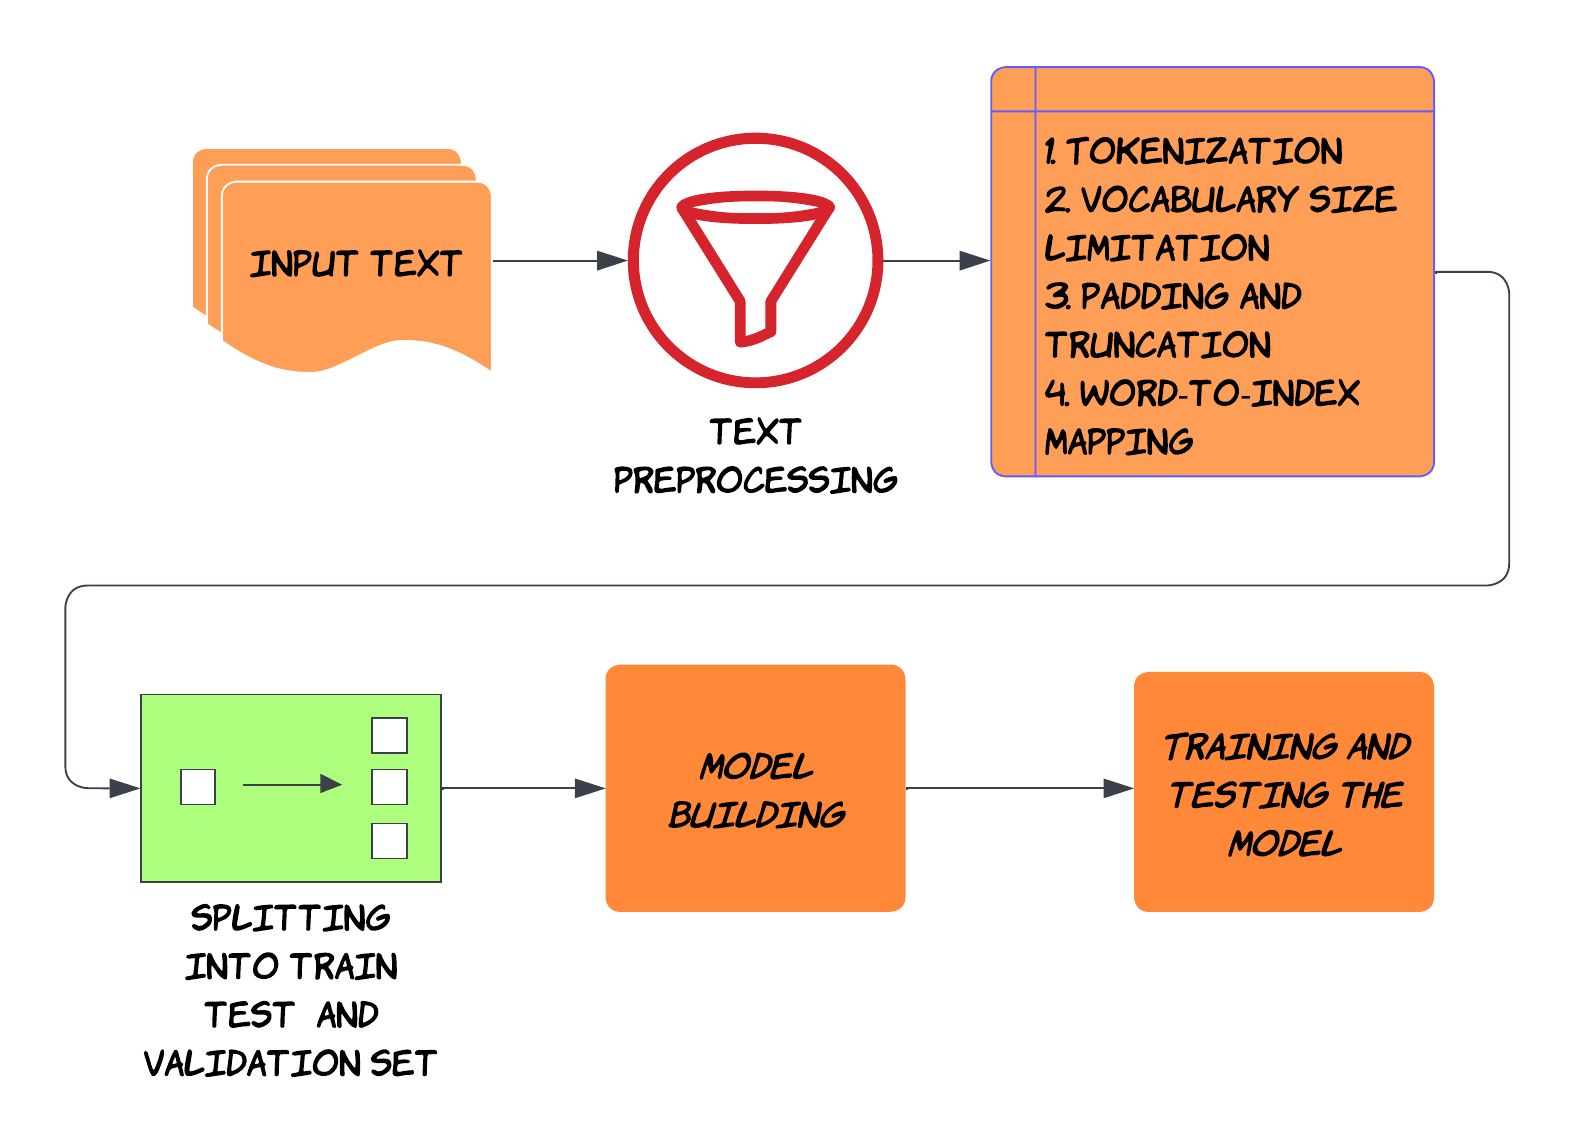



In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Bidirectional, SpatialDropout1D
# Sequential Model
model = Sequential()

# Embeddidng layer
model.add(Embedding(MAX_Number_of_WORDS, Embedding_Dimention, input_length=X.shape[1])) # to perform word embedding

# Add a dropout layer to randomly drop some of the input, which can help prevent overfitting
model.add(SpatialDropout1D(0.5))

# Bi-Directional LSTM
model.add(Bidirectional(LSTM(32,dropout=0.2, recurrent_dropout=0.2)))

# Dense layers
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          6000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 250, 100)          0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 64)                34048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6036161 (23.03 MB)
Trainable params: 60361

##***Training the model***
***

In [ ]:
import time
start_time = time.time()
epochs=3
batch_size=32
history = model.fit(train_texts, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(val_texts, val_labels),verbose=2)
end_time = time.time()
training_time = end_time - start_time

print("Training time:", training_time, "seconds")

Epoch 1/3
442/442 - 120s - loss: 0.1622 - acc: 0.9309 - val_loss: 0.0832 - val_acc: 0.9762 - 120s/epoch - 273ms/step
Epoch 2/3
442/442 - 113s - loss: 0.0327 - acc: 0.9907 - val_loss: 0.0624 - val_acc: 0.9802 - 113s/epoch - 257ms/step
Epoch 3/3
442/442 - 147s - loss: 0.0245 - acc: 0.9936 - val_loss: 0.0974 - val_acc: 0.9751 - 147s/epoch - 332ms/step
Training time: 380.9299056529999 seconds


#***Checking Train loss and Validation loss with respect to epochs***

---



In [ ]:
# Plot training and validation loss
fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history.history['loss'], mode='lines', name='Training Loss'))
fig_loss.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history.history['val_loss'], mode='lines', name='Validation Loss'))
fig_loss.update_layout(title='Model Loss', xaxis_title='Epoch', yaxis_title='Loss')
fig_loss.show()

# ***Checking train accuracy and Validation Accuracy with respect to epochs***

---



In [ ]:
# Plot training and validation accuracy
fig_acc = go.Figure()
fig_acc.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history.history['acc'], mode='lines', name='Training Accuracy'))
fig_acc.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history.history['val_acc'], mode='lines', name='Validation Accuracy'))
fig_acc.update_layout(title='Model Accuracy', xaxis_title='Epoch', yaxis_title='Accuracy')
fig_acc.show()

# ***Checking the performance on the test set***

In [ ]:
performance = model.evaluate(test_texts, test_labels)
print('Test Set Loss: {:0.3f}  \n  Test Set Accuracy: {:0.4f}'.format(performance[0],performance[1]))

56/56 [==============================] - 2s 32ms/step - loss: 0.1087 - acc: 0.9734
Test Set Loss: 0.109  
  Test Set Accuracy: 0.9734


##***TRANSFORMER: Overcoming Limitations of LSTM***
***

>*The Transformer architecture represents a significant advancement in natural language processing compared to traditional LSTM models. While LSTM models have improved long-term dependency modeling, they still possess certain limitations that the Transformer architecture addresses:*

>***1.Sequential Computation:*** *LSTM models process input sequentially, word by word. In contrast, the Transformer architecture enables parallel computation, processing the entire input text simultaneously. This parallelism significantly speeds up computation, making it more efficient.*

>***2.Fixed-Length Context:*** *LSTMs rely on a fixed-length context window, which restricts their ability to capture long-term dependencies in the input sequence. In contrast, Transformer-based models leverage self-attention and layer normalization techniques to dynamically attend to different parts of the input sequence. This allows Transformers to capture longer-term dependencies and model context more effectively.*

>***3.Vanishing Gradients:*** *LSTMs can encounter vanishing gradient problems, particularly when dealing with longer text sequences (e.g., beyond 100 words). The vanishing gradient problem arises when gradients used to update model weights become very small, impeding effective training. Transformers mitigate this issue through the self-attention mechanism and layer normalization, which help minimize vanishing gradients and facilitate more stable and efficient training.*

>By addressing these limitations, the Transformer architecture offers significant advantages over LSTM models. Its ability to process input in parallel, capture longer-term dependencies, and mitigate vanishing gradient problems makes it a powerful tool for modeling and understanding natural language.



##***Model Introduction - Transformer Architecture for Email Classification***
***

>*The Transformer model, as described in the "Attention is All You Need" paper, consists of an Encoder stack and Decoder stack. However, for the task of Email Classification, which is a sequence-to-one model where the input is Email text and the output is binary classification, only the encoder block is required.*
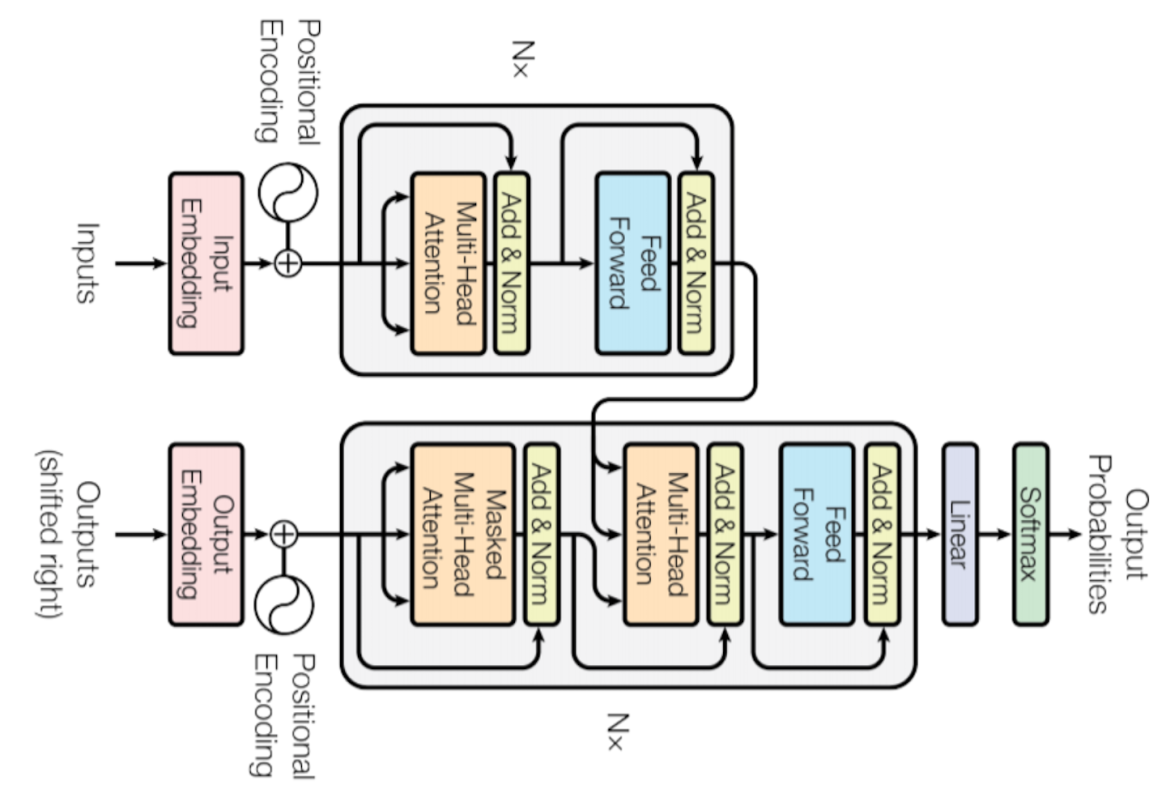

>*The encoder block comprises several components:*

>***1.Word Embedding:*** *Word embedding is used to convert words into vector representations. Each word is assigned an embedding dimension, which is a tunable hyperparameter. Word embedding helps to capture the meaning of words and cluster similar words together.*

>***2.Positional Encoding:*** *Since the Transformer architecture lacks recurrent connections like RNNs, positional encoding is introduced to incorporate positional information about each word in the sentence. Positional encoding is added to the word embedding vector to provide the model with an understanding of word order.*

>***3.Multi-Head Attention:*** *Self-attention is employed to determine the contextual representation of a word in a sentence. It calculates the attention weight of a query word with respect to other words in the sentence. Multiple self-attention heads work in parallel to capture different relationships among words. The outputs of the self-attention heads are weighted and concatenated before being passed to the next feed-forward layer.*

>***4.Layer Normalization:*** *Layer normalization is used to normalize the activation of each layer in the Transformer. It reduces the dependency of the network on the scale of input features and stabilizes the distribution of activations in the feature dimensions. This helps improve convergence during the training process.*

>***5.Feed-Forward Layer:*** *The output of the attention layer undergoes layer normalization and is then passed through a feed-forward layer. The feed-forward layer applies a non-linear transformation to the outputs of the self-attention mechanism. This enables the Transformer model to capture complex, non-linear relationships between input and output sequences, as well as between input features.*

>By incorporating these components, the Transformer model offers a powerful architecture for Email Classification, allowing it to effectively capture the contextual meaning of words and capture intricate relationships within the Email text.



# ***Workflow diagram of Transformer based model***

---
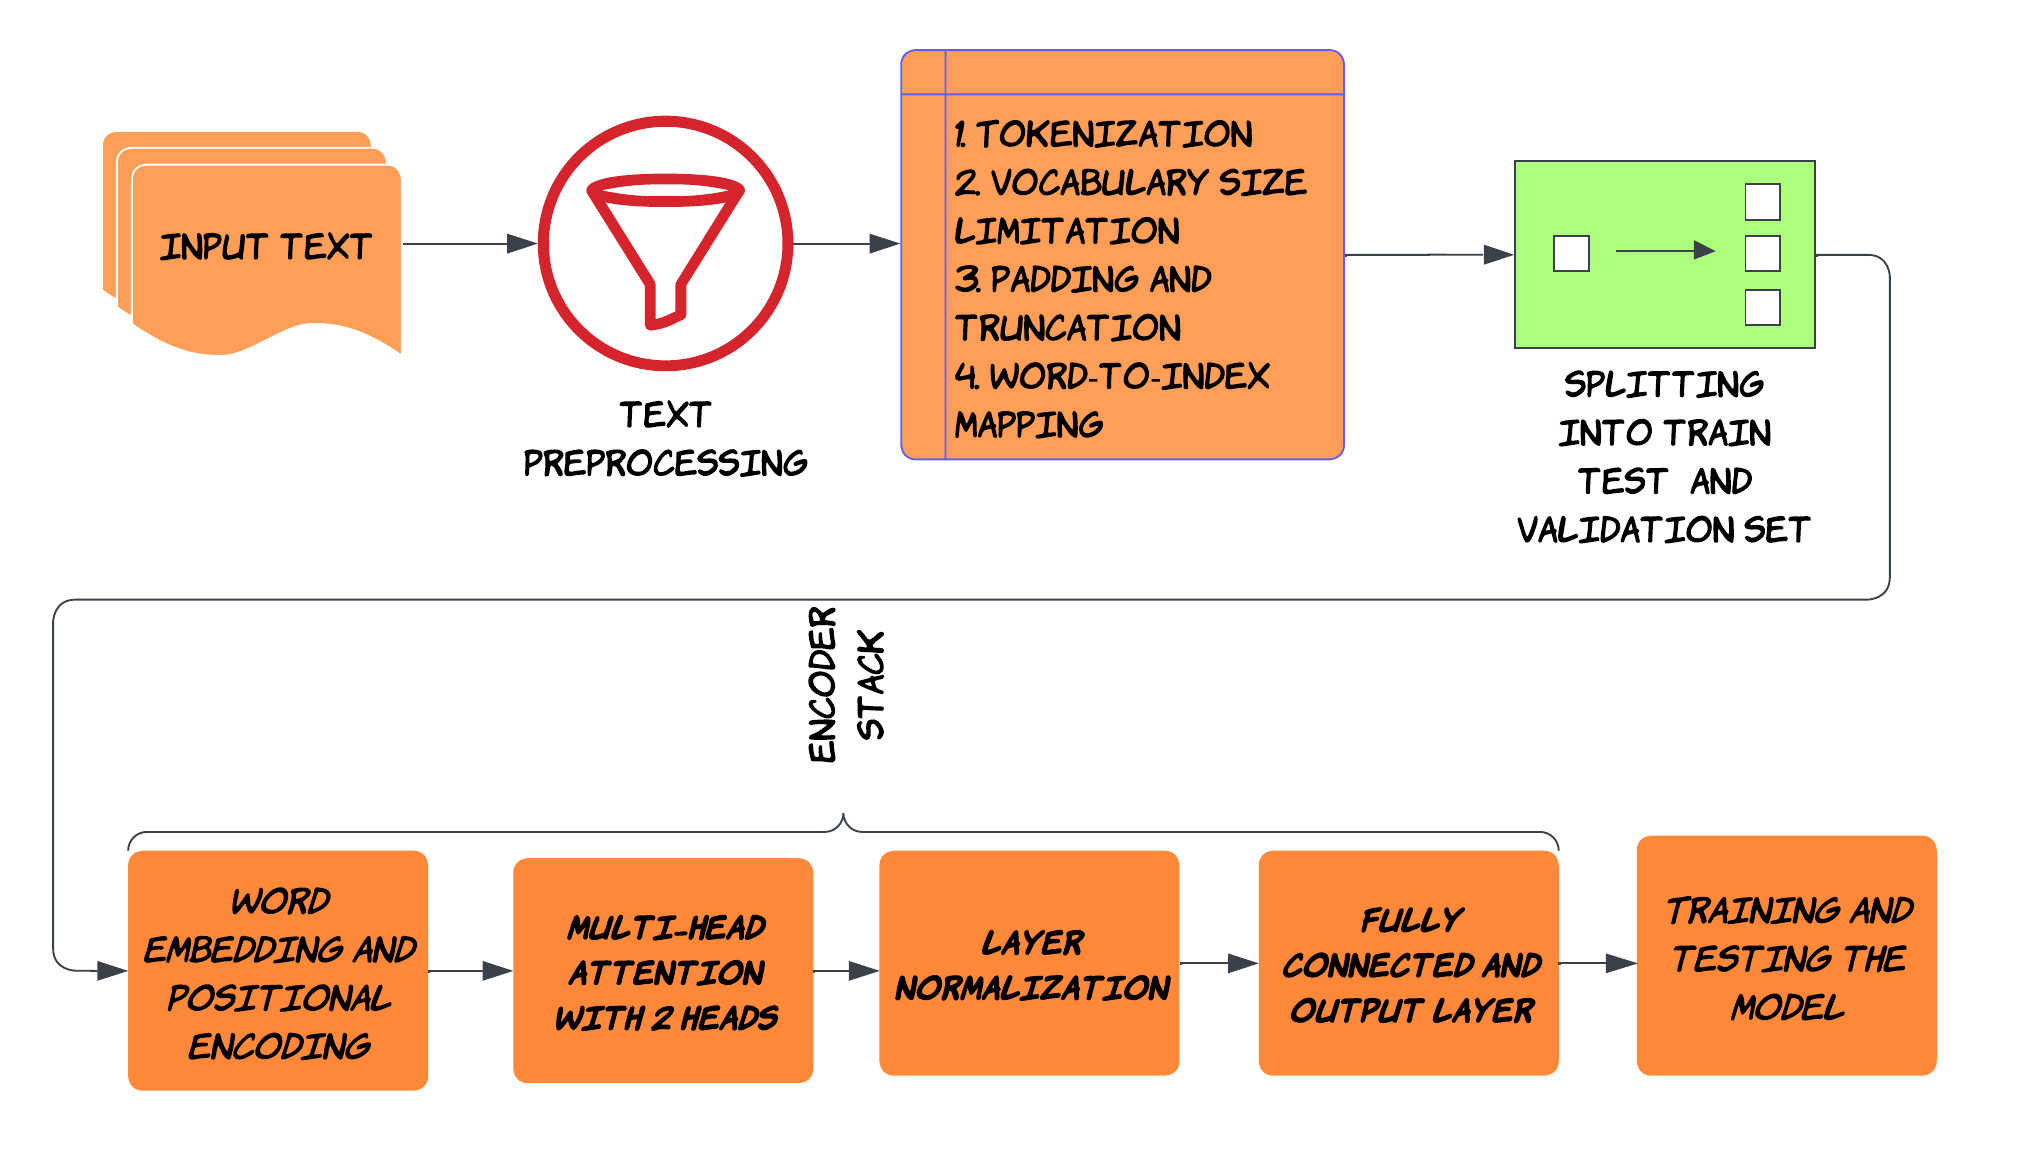


##***Importing the Keras and Tensorflow Library***
***

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

##***Creating Transformer block***
***

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim)]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6) #epsilon=1e-6 to avoid zero division error during normalization
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) #skip connection
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training) #skip conneciton
        return self.layernorm2(out1 + ffn_output)

##***Creating embeddings with positional Encodding***
***

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

##***Preparing the data for the model***
***

In [ ]:
# Define the Transformer model for text classification
vocab_size = 60000  # Define your vocabulary size
maxlen = 250  # Define your maximum sequence length
embed_dim = 100  # Define your embedding dimension
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in the feed-forward network

##***Developing the model***
***

In [ ]:
inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x, training=True)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_transformer = keras.Model(inputs=inputs, outputs=outputs)

##***Compiling the model***
***

In [ ]:
model_transformer.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_transformer.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250)]             0         
                                                                 
 token_and_position_embeddi  (None, 250, 100)          6025000   
 ng (TokenAndPositionEmbedd                                      
 ing)                                                            
                                                                 
 transformer_block (Transfo  (None, 250, 100)          87632     
 rmerBlock)                                                      
                                                                 
 global_average_pooling1d (  (None, 100)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dropout_2 (Dropout)         (None, 100)               0     

##***Training the model and computing the training time***
***

In [ ]:
import time
start_time = time.time()
history_transformer = model_transformer.fit(train_texts, train_labels,
                    batch_size=64, epochs=3,
                    validation_data=(val_texts,val_labels)
                   )
end_time = time.time()
training_time = end_time - start_time

print("Training time:", training_time, "seconds")

Epoch 1/3
221/221 [==============================] - 117s 520ms/step - loss: 0.2172 - accuracy: 0.8932 - val_loss: 0.0469 - val_accuracy: 0.9842
Epoch 2/3
221/221 [==============================] - 115s 519ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0410 - val_accuracy: 0.9813
Epoch 3/3
221/221 [==============================] - 114s 516ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.0626 - val_accuracy: 0.9819
Training time: 346.11669993400574 seconds


##***Checking the performance of the mode on the test set***
***

In [ ]:
performance_transformer = model_transformer.evaluate(test_texts, test_labels)
print('Test Set Loss: {:0.3f} \n  Test Set Accuracy: {:0.4f}'.format(performance_transformer[0],performance_transformer[1]))

56/56 [==============================] - 5s 84ms/step - loss: 0.0677 - accuracy: 0.9779
Test Set Loss: 0.068 
  Test Set Accuracy: 0.9779


##***Checking Train loss and Validation loss with respect to epochs***
***

In [ ]:
fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history_transformer.history['loss'], mode='lines', name='Training Loss'))
fig_loss.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history_transformer.history['val_loss'], mode='lines', name='Validation Loss'))
fig_loss.update_layout(title='Model Loss', xaxis_title='Epoch', yaxis_title='Loss')
fig_loss.show()

##***Checking Train Accuracy and Validation Accuracy with respect to epochs***
***

In [ ]:
# Plot training and validation accuracy
fig_acc = go.Figure()
fig_acc.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history_transformer.history['accuracy'], mode='lines', name='Training Accuracy'))
fig_acc.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history_transformer.history['val_accuracy'], mode='lines', name='Validation Accuracy'))
fig_acc.update_layout(title='Model Accuracy', xaxis_title='Epoch', yaxis_title='Accuracy')
fig_acc.show()

#BERT
---
1. BERT is an acronym for Bidirectional Encoder Representations from
Transformers.
2. BERT architecture consists of several Transformer encoders stacked together. Each Transformer encoder encapsulates two sub-layers: a self-attention layer and a feed-forward layer.
3. BERT base, which is a BERT model consists of 12 layers of Transformer encoder, 12 attention heads, 768 hidden size, and 110M parameters.
4. In the context of BERT models, "uncased" refers to the fact that the model is case-insensitive during training and inference. Specifically, the "uncased" models are trained on lowercased text, meaning that all the text is converted to lowercase before being processed by the model.
5. BERT model then will output an embedding vector of size 768 in each of the tokens. We can use these vectors as an input for different kinds of NLP applications, whether it is text classification, next sentence prediction, Named-Entity-Recognition (NER), or question-answering.

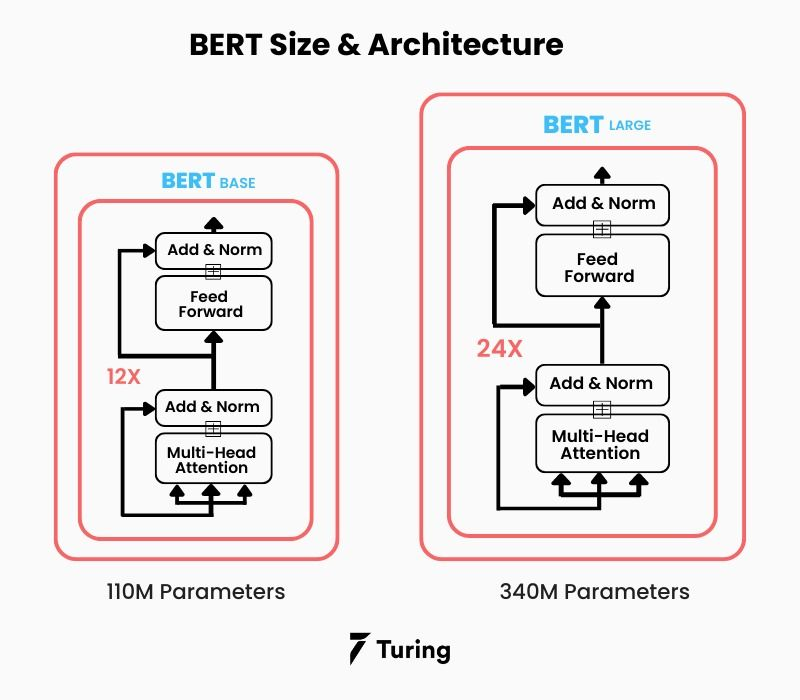



In [ ]:
import torch
X_train_tokens = None
y_train_tensor = None
torch.cuda.empty_cache()

#Model Architecture
1. Bert Model (Pretained)
2. Drapout layer
3. Embedded output of size (768,1) which is a dense layer. Here 1 is defined to get a single output so that it can be used for classification.
4. Final decision layer with sigmoid activation function.

In [ ]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
import numpy as np
import time

# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Define your neural network
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.bert = bert_model
        self.dropout = nn.Dropout(0.1)
        self.linear = nn.Linear(768, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_ids, attention_mask, token_type_ids):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooled_output = outputs.pooler_output
        dropped_output = self.dropout(pooled_output)
        linear_output = self.linear(dropped_output)
        return self.sigmoid(linear_output)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MyModel().to(device)

#Defining the train-test set and input size for training

In [ ]:
# Assuming X_train and y_train are your training data
X = dataset_model['subject_body']
y = dataset_model['label']
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y)
y_train = np.asarray(y_train).astype(int)
y_val = np.asarray(y_val).astype(int)

# Reduce the batch size
batch_size = 4

# Convert data to PyTorch tensors with limited sequence length
X_train_tokens = tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors='pt', max_length=64)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

X_val_tokens = tokenizer(X_val.tolist(), padding=True, truncation=True, return_tensors='pt', max_length=64)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

# Move tensors to GPU if available
X_train_tokens = {key: value.to(device) for key, value in X_train_tokens.items()}
y_train_tensor = y_train_tensor.to(device)

X_val_tokens = {key: value.to(device) for key, value in X_val_tokens.items()}
y_val_tensor = y_val_tensor.to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

# Initialize variables for tracking training history
history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}


#Training the Model

In [ ]:
# Training loop
start_time = time.time()
model.train()
epochs = 5

for epoch in range(epochs):
    tqdm_batch_iterator = tqdm(range(0, len(X_train_tokens['input_ids']), batch_size), desc=f'Epoch {epoch+1}/{epochs}')

    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for i in tqdm_batch_iterator:
        optimizer.zero_grad()
        batch_tokens = {key: value[i:i+batch_size] for key, value in X_train_tokens.items()}
        outputs = model(**batch_tokens)
        loss = criterion(outputs, y_train_tensor[i:i+batch_size])
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predictions = (outputs > 0.5).float()
        correct_predictions += (predictions == y_train_tensor[i:i+batch_size]).sum().item()
        total_samples += batch_size

        tqdm_batch_iterator.set_postfix(loss=total_loss / total_samples, accuracy=correct_predictions / total_samples)

    # Calculate training accuracy
    accuracy = correct_predictions / total_samples
    history['accuracy'].append(accuracy)

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_total_loss = 0.0
        val_correct_predictions = 0
        val_total_samples = 0

        for j in range(0, len(X_val_tokens['input_ids']), batch_size):
            val_batch_tokens = {key: value[j:j+batch_size] for key, value in X_val_tokens.items()}
            val_outputs = model(**val_batch_tokens)
            val_loss = criterion(val_outputs, y_val_tensor[j:j+batch_size])

            val_total_loss += val_loss.item()
            val_predictions = (val_outputs > 0.5).float()
            val_correct_predictions += (val_predictions == y_val_tensor[j:j+batch_size]).sum().item()
            val_total_samples += batch_size

        avg_val_loss = val_total_loss / val_total_samples
        avg_val_accuracy = val_correct_predictions / val_total_samples
        print(f'Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {avg_val_accuracy * 100:.2f}%')

        # Save training history
        history['loss'].append(total_loss / total_samples)
        history['val_loss'].append(avg_val_loss)
        history['val_accuracy'].append(avg_val_accuracy)

end_time = time.time()
training_time = end_time - start_time

print("Training time:", training_time, "seconds")


Epoch 1/5: 100%|██████████| 3313/3313 [10:24<00:00,  5.31it/s, accuracy=0.946, loss=0.0333]


Validation Loss: 0.0137, Validation Accuracy: 98.12%


Epoch 2/5: 100%|██████████| 3313/3313 [10:06<00:00,  5.46it/s, accuracy=0.991, loss=0.00654]


Validation Loss: 0.0154, Validation Accuracy: 98.21%


Epoch 3/5: 100%|██████████| 3313/3313 [10:06<00:00,  5.47it/s, accuracy=0.995, loss=0.00348]


Validation Loss: 0.0158, Validation Accuracy: 98.28%


Epoch 4/5: 100%|██████████| 3313/3313 [10:05<00:00,  5.47it/s, accuracy=0.998, loss=0.00203]


Validation Loss: 0.0215, Validation Accuracy: 98.01%


Epoch 5/5: 100%|██████████| 3313/3313 [10:07<00:00,  5.45it/s, accuracy=0.999, loss=0.00102] 


Validation Loss: 0.0186, Validation Accuracy: 98.60%
Training time: 3494.3871121406555 seconds


#Model Evaluation

In [ ]:
# Set the model to evaluation mode
model.eval()

# Convert test data to PyTorch tensors
X_test_tokens = tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors='pt', max_length=64)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Move tensors to GPU if available
X_test_tokens = {key: value.to(device) for key, value in X_test_tokens.items()}
y_test_tensor = y_test_tensor.to(device)

# Initialize variables for evaluation
total_loss = 0.0
correct_predictions = 0
total_samples = 0

# Iterate over the test set
with torch.no_grad():
    for i in range(0, len(X_test_tokens['input_ids']), batch_size):
        batch_tokens = {key: value[i:i+batch_size] for key, value in X_test_tokens.items()}
        outputs = model(**batch_tokens)
        loss = criterion(outputs, y_test_tensor[i:i+batch_size])

        total_loss += loss.item()
        predictions = (outputs > 0.5).float()
        correct_predictions += (predictions == y_test_tensor[i:i+batch_size]).sum().item()
        total_samples += batch_size

# Calculate and print test metrics
average_loss = total_loss / total_samples
accuracy = correct_predictions / total_samples

print(f"Test Loss: {average_loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Loss: 0.0047
Test Accuracy: 99.59%


In [ ]:
# Plot the training and validation loss
fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history['loss'], mode='lines', name='Training Loss'))
fig_loss.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history['val_loss'], mode='lines', name='Validation Loss'))
fig_loss.update_layout(title='Model Loss', xaxis_title='Epoch', yaxis_title='Loss')
fig_loss.show()

In [ ]:
# Plot training and validation accuracy
fig_acc = go.Figure()
fig_acc.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history['accuracy'], mode='lines', name='Training Accuracy'))
fig_acc.add_trace(go.Scatter(x=list(range(1, epochs+1)), y=history['val_accuracy'], mode='lines', name='Validation Accuracy'))
fig_acc.update_layout(title='Model Accuracy', xaxis_title='Epoch', yaxis_title='Accuracy')
fig_acc.show()

#*Model Comparision*

---


| Metrics               | Bi-directional LSTM | Transformer | BERT   |
|-----------------------|---------------------|-------------|--------|
| Train Accuracy        | 0.993               | 0.981       | 0.999  |
| Test Accuracy         | 0.973               | 0.977       | 0.995  |
| Validation Accuracy   | 0.975               | 0.996       | 0.986  |
| Training Time         | 381 Seconds         | 346 Seconds | 3494 Seconds |


#*Conclusion*

---

Among all the model, the performance of BERT outperforms all the other models. It's having higher training time compare to LSTM and Transformer but Test Acuuracy is better compared to that of others.

##***Reference:***
***
>*1.* [*Text classification with Transformer*](https://keras.io/examples/nlp/text_classification_with_transformer/)

>*2.* [*False and misleading claims about the vote go viral*](https://www.bbc.com/news/63486497)

>*3.* [*Transformers For Text Classification*](https://blog.paperspace.com/transformers-text-classification/)

>*4.* [*The Illustrated Transformer*](http://jalammar.github.io/illustrated-transformer/)

>*5.* [*A Stepwise Introduction to Topic Modeling using Latent Semantic Analysis (using Python)*](https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/)

> *6.* https://medium.com/@samia.khalid/bert-explained-a-complete-guide-with-theory-and-tutorial-3ac9ebc8fa7c

> *7.* https://www.tensorflow.org/text/tutorials/classify_text_with_bert